# Static Data Load

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
Created a function 'load_data_excel' to load excel into python
'''

import pandas as pd
import numpy as np
import os

def load_data_excel(file_path):
    """
    Load data from an Excel file and return a DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    df = pd.read_excel(file_path)
    return df

In [3]:
'''
Loaded VED_Static_Data_ICE&HEV into dataframe df_ICE_HEV_original using the above function
Loaded VED_Static_Data_PHEV&EV into dataframe df_ICE_HEV_original using the above function
Created a copy of the original dataframe into df_ICE_HEV and df_PHEV_EV respectively.
'''

df_ICE_HEV_original = load_data_excel("G:\\DIYguru\\Notes and Sample Data\\VED-master\\Data\\VED_Static_Data_ICE&HEV.xlsx")
df_PHEV_EV_original = load_data_excel("G:\\DIYguru\\Notes and Sample Data\\VED-master\\Data\\VED_Static_Data_PHEV&EV.xlsx")

df_ICE_HEV = df_ICE_HEV_original.copy()
df_PHEV_EV = df_PHEV_EV_original.copy()

In [4]:
df_ICE_HEV.info()
df_PHEV_EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   VehId                                357 non-null    int64 
 1   Vehicle Type                         357 non-null    object
 2   Vehicle Class                        357 non-null    object
 3   Engine Configuration & Displacement  357 non-null    object
 4   Transmission                         354 non-null    object
 5   Drive Wheels                         357 non-null    object
 6   Generalized_Weight                   357 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   VehId                  

In [5]:
'''
Checked unique values in both the dataframe
'''

for i in df_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_ICE_HEV[i].unique())

Unique values in column 'VehId':
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 433 434 435
 436 437 438 439 4

In [6]:
for i in df_PHEV_EV.columns:
    print(f"Unique values in column '{i}':")
    print(df_PHEV_EV[i].unique())

Unique values in column 'VehId':
[  9  10  11 371 379 388 398 417 431 443 449 453 455 457 492 497 536 537
 541 542 545 550 554 560 561 567 569]
Unique values in column 'EngineType':
['PHEV' 'EV']
Unique values in column 'Vehicle Class':
['Car']
Unique values in column 'Engine Configuration & Displacement':
['4-GAS/ELECTRIC 1.4L' 'ELECTRIC' '4-GAS/ELECTRIC 2.0L'
 '4-GAS/ELECTRIC 1.8L' '4-GAS/ELECTRIC 1.5L']
Unique values in column 'Transmission':
['NO DATA' 'CVT']
Unique values in column 'Drive Wheels':
['FWD']
Unique values in column 'Generalized_Weight':
[4000 3500 3000]


In [7]:
'''
Replaced 'NO DATA' with nan
'''

df_ICE_HEV.replace('NO DATA', np.nan, inplace=True)
df_PHEV_EV.replace('NO DATA', np.nan, inplace=True)

In [8]:
'''
Handle data type changes and column renames to concatenate two dataframes
'''

df_ICE_HEV['Drive Wheels'] = df_ICE_HEV['Drive Wheels'].astype('object')
df_PHEV_EV.rename(columns={'EngineType': 'Vehicle Type'}, inplace=True)


In [9]:
'''
Created new df_static by concatenating df_ICE_HEV and df_PHEV_EV
'''

df_static = pd.concat([df_ICE_HEV, df_PHEV_EV], ignore_index=True)

In [10]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   VehId                                384 non-null    int64  
 1   Vehicle Type                         384 non-null    object 
 2   Vehicle Class                        32 non-null     object 
 3   Engine Configuration & Displacement  384 non-null    object 
 4   Transmission                         95 non-null     object 
 5   Drive Wheels                         27 non-null     object 
 6   Generalized_Weight                   368 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 21.1+ KB


In [11]:
'''
Checked unique and number of unique values in the new df_static
'''

for i in df_static.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_static[i].nunique()}")
    print(df_static[i].unique())
    print(df_static[i].value_counts())


Unique values in column 'VehId':
Number of unique values: 384
[  2   5   7   8  12 108 110 115 116 119 120 123 124 125 126 128 129 130
 131 132 133 135 137 138 139 140 141 142 143 145 147 148 149 150 153 154
 155 156 157 159 160 161 162 163 164 165 167 169 172 174 176 179 180 181
 184 185 187 189 190 191 192 193 195 196 199 200 201 202 203 205 206 207
 208 209 211 212 213 214 215 216 217 218 220 222 223 225 228 230 231 232
 233 234 235 237 238 240 241 242 243 244 246 247 248 249 250 251 252 254
 255 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273 274 275
 276 278 280 282 283 285 286 288 289 291 292 293 297 298 299 300 301 302
 303 304 306 307 308 309 311 312 313 315 318 319 321 323 324 325 326 328
 329 330 332 333 334 337 338 340 344 345 346 347 348 349 350 351 353 354
 355 356 357 359 360 366 367 368 369 370 372 374 375 376 378 380 381 382
 383 384 385 386 387 389 392 393 394 397 399 400 401 402 403 404 405 406
 407 409 410 411 413 414 415 416 418 422 426 428 429 430 432 

In [12]:
df_static.describe(include='all')

,VehId,Vehicle Type,Vehicle Class,Engine Configuration & Displacement,Transmission,Drive Wheels,Generalized_Weight
count,384.000000,384,32,384,95,27,368.000000
unique,NaN,4,2,74,17,1,NaN
top,NaN,ICE,Car,4-FI 2.4L,CVT,FWD,NaN
freq,NaN,264,31,48,27,27,NaN
mean,360.867188,NaN,NaN,NaN,NaN,NaN,3483.695652
std,153.293829,NaN,NaN,NaN,NaN,NaN,697.215509
min,2.000000,NaN,NaN,NaN,NaN,NaN,2000.000000
25%,236.500000,NaN,NaN,NaN,NaN,NaN,3000.000000
50%,369.500000,NaN,NaN,NaN,NaN,NaN,3500.000000
75%,485.250000,NaN,NaN,NaN,NaN,NaN,4000.000000


In [13]:
'''
Checked duplicates
'''

duplicates = df_static.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_static[duplicates])

# Dynamic Data Load

In [14]:
'''
Created a function 'load_csv_files_from_directory' to load multiple csv files from a directory into python
'''

def load_csv_files_from_directory(directory):
    """
    Load all CSV files from a specified directory and return a concatenated DataFrame.
    """
    all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = []
    
    for file in all_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)

In [15]:
'''
Loaded VED_DynamicData_Part1 into dataframe df_part1_original using the above function
Loaded VED_DynamicData_Part2 into dataframe df_part2_original using the above function
Created a copy of the original dataframe into df_part1 and df_part2 respectively.
'''

df_part1_original = load_csv_files_from_directory("G:\\DIYguru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part1")
#df_part2_original = load_csv_files_from_directory("G:\\DIYguru\\Notes and Sample Data\\VED-master\\Data\\VED_DynamicData_Part2")

df_part1 = df_part1_original.copy()
#df_part2 = df_part2_original.copy()


In [16]:
df_part1.info()
#df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236957 entries, 0 to 10236956
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   DayNum                          float64
 1   VehId                           int64  
 2   Trip                            int64  
 3   Timestamp(ms)                   int64  
 4   Latitude[deg]                   float64
 5   Longitude[deg]                  float64
 6   Vehicle Speed[km/h]             float64
 7   MAF[g/sec]                      float64
 8   Engine RPM[RPM]                 float64
 9   Absolute Load[%]                float64
 10  OAT[DegC]                       float64
 11  Fuel Rate[L/hr]                 float64
 12  Air Conditioning Power[kW]      float64
 13  Air Conditioning Power[Watts]   float64
 14  Heater Power[Watts]             float64
 15  HV Battery Current[A]           float64
 16  HV Battery SOC[%]               float64
 17  HV Battery Voltage[V]    

In [17]:
'''
Checked unique values in both the dataframe
'''

for i in df_part1.columns:
    print(f"Unique values in column '{i}':")
    print(df_part1[i].unique())

Unique values in column 'DayNum':
[  1.58665119   1.93178629   1.71977381 ... 154.07965256 154.6622428
 154.03639969]
Unique values in column 'VehId':
[  8  10  11 124 125 130 133 147 154 155 156 160 165 174 176 184 189 195
 203 207 209 212 216 220 223 228 230 231 233 237 240 241 242 259 260 265
 267 272 278 298 299 301 304 319 323 334 340 344 350 351 353 355 356 370
 374 378 387 388 394 410 411 418 430 433 434 438 439 440 445 449 450 451
 452 456 460 462 468 477 478 488 497 502 507 516 519 521 528 532 535 537
 540 547 549 550 557 569 574 575 576 579 584 588 108 110 116 128 140 150
 157 180 181 185 192 215 225 244 246 248 249 250 257 258 276 291 307 315
 330 367 369 384 392 393 398 403 415 422 431 432 443 444 453 464 465 480
 486 494 500 530 531 533 543 546 555 560 564 587 595 601 163 196 205 213
 217 222 234 266 273 283 289 308 309 324 326 345 346 372 375 382 399 400
 402 426 441 482 483 538 554 565 592 596 597 606 608 126 132 218 232 243
 264 268 282 292 337 347 359 368 385 405 428 4

In [ ]:
'''
for i in df_part2.columns:
    print(f"Unique values in column '{i}':")
    print(df_part2[i].unique())

'''

In [ ]:
'''
Created new df_dynamic by concatenating df_part1 and df_part2
'''

#df_dynamic = pd.concat([df_part1, df_part2], ignore_index=True)

In [ ]:
#df_dynamic.info()

In [ ]:
'''
Checked unique and number of unique values in the new df_dynamic


for i in df_dynamic.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df_dynamic[i].nunique()}")
    print(df_dynamic[i].unique())
    print(df_dynamic[i].value_counts())

'''

In [ ]:
#df_dynamic.head()

In [ ]:
'''
Checked duplicates

duplicates = df_dynamic.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df_dynamic[duplicates])
'''

In [18]:
df_static.columns

Index(['VehId', 'Vehicle Type', 'Vehicle Class',
       'Engine Configuration & Displacement', 'Transmission', 'Drive Wheels',
       'Generalized_Weight'],
      dtype='object')

In [ ]:
#df_dynamic.columns

# Join Static and Dynamic dataframes

In [19]:
'''
Dynamic has 22436808 records and so was not able to join because of RAM size
'''

#print(df_dynamic['VehId'].nunique(), len(df_dynamic))
print(df_static['VehId'].nunique(), len(df_static))

384 384


In [20]:
'''
Even the sample of 50% df_dynamic didnt work, so pulled 50% sample from df_part1 instead of df_dynamic which has 5118478 records
'''

df_dynamic_sample = df_part1.sample(frac=0.50, random_state=42)

In [21]:
len(df_dynamic_sample)

5118478

In [22]:
'''
Joined dataframe df with 5118478 entries is created.
'''

df = df_dynamic_sample.merge(df_static, on='VehId', how='left')

In [23]:
#22436808
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118478 entries, 0 to 5118477
Data columns (total 28 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   DayNum                               float64
 1   VehId                                int64  
 2   Trip                                 int64  
 3   Timestamp(ms)                        int64  
 4   Latitude[deg]                        float64
 5   Longitude[deg]                       float64
 6   Vehicle Speed[km/h]                  float64
 7   MAF[g/sec]                           float64
 8   Engine RPM[RPM]                      float64
 9   Absolute Load[%]                     float64
 10  OAT[DegC]                            float64
 11  Fuel Rate[L/hr]                      float64
 12  Air Conditioning Power[kW]           float64
 13  Air Conditioning Power[Watts]        float64
 14  Heater Power[Watts]                  float64
 15  HV Battery Current[A]           

In [24]:
'''
Checked for duplicates
'''

duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found in the DataFrame:")
    print(df[duplicates])

In [25]:
'''
Checked unique and number of unique values in the new df_dynamic
'''

for i in df.columns:
    print(f"\nUnique values in column '{i}':")
    print(f"Number of unique values: {df[i].nunique()}")
    print(df[i].unique())
    print(df[i].value_counts())


Unique values in column 'DayNum':
Number of unique values: 15383
[130.55213663 109.90206494  46.50061109 ...  30.59042635   7.60616594
  76.84865423]
DayNum
47.605510     5395
42.708322     4880
100.445583    3220
1.477313      3179
23.953190     2932
              ... 
35.892528       42
141.737495      42
37.589300       41
36.048668       40
114.777630      39
Name: count, Length: 15383, dtype: int64

Unique values in column 'VehId':
Number of unique values: 368
[487 392 285 566 242 560 494 240 369 542 565 428 156 212 455 394 452 443
 308 465 176 418 237 371 278 577  10 545 301 271 192 289 460 531 562 557
 181 230 370 208 184 323 272 356 298 459 536 160 283 477 484 534 139 533
 120 232 569 411 470 195   2 250 180   8 258 540 591 454 319 488 409 415
 309 564 457 349 374 516 595 135 282 233 185 378 368 223 437 274 140 213
 483 618 269 228 561 353 372 388 333 163 203 522 299 205 592 430 439 490
 435 276 530 196 286 447 155 476 266 147 475 347 410 444 215 575 218 351
 546 468 307 450 6

In [26]:
df.head().to_dict()

{'DayNum': {0: 130.55213663,
  1: 109.902064944,
  2: 46.5006110926,
  3: 46.7281407963,
  4: 94.7527253241},
 'VehId': {0: 487, 1: 392, 2: 285, 3: 566, 4: 242},
 'Trip': {0: 1168, 1: 637, 2: 1387, 3: 216, 4: 600},
 'Timestamp(ms)': {0: 35200, 1: 343300, 2: 1287100, 3: 76300, 4: 70900},
 'Latitude[deg]': {0: 42.25612,
  1: 42.2944894444,
  2: 42.2817447222,
  3: 42.3052466667,
  4: 42.2303102778},
 'Longitude[deg]': {0: -83.6924769444,
  1: -83.6826069444,
  2: -83.7568280556,
  3: -83.735115,
  4: -83.6957636111},
 'Vehicle Speed[km/h]': {0: 58.0, 1: 63.0, 2: 49.0, 3: 51.0, 4: 63.0},
 'MAF[g/sec]': {0: 5.53999996185,
  1: 13.3999996185,
  2: 17.5200004578,
  3: 0.070000000298,
  4: 0.930000007153},
 'Engine RPM[RPM]': {0: 1504.0, 1: 1135.0, 2: 1665.0, 3: 0.0, 4: 0.0},
 'Absolute Load[%]': {0: nan,
  1: 35.2941169739,
  2: 44.7058830261,
  3: 0.0,
  4: 56.4705886841},
 'OAT[DegC]': {0: nan, 1: 5.0, 2: nan, 3: nan, 4: 5.0},
 'Fuel Rate[L/hr]': {0: nan, 1: nan, 2: nan, 3: nan, 4: nan},
 

In [27]:
'''
Mapped these values to OAT[DegC] values and create a new column 'OAT_Category' (< -20 'Extremely Cold' , -20 to 0 'Cold', 0 to 10 'Cool', 10 to 20 'Mild', 20 to 30 'Warm', > 30 'Hot')
'''

def categorize_oat(value):
    if value < -20:
        return 'Extremely Cold'
    elif -20 <= value < 0:
        return 'Cold'
    elif 0 <= value < 10:
        return 'Cool'
    elif 10 <= value < 20:
        return 'Mild'
    elif 20 <= value < 30:
        return 'Warm'
    elif value >= 30:
        return 'Hot'
    else:
        return np.nan

df['OAT_Category'] = df['OAT[DegC]'].apply(categorize_oat)


In [28]:
df['OAT_Category'].unique()

array([nan, 'Cool', 'Cold', 'Mild', 'Warm', 'Extremely Cold', 'Hot'],
      dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118478 entries, 0 to 5118477
Data columns (total 29 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   DayNum                               float64
 1   VehId                                int64  
 2   Trip                                 int64  
 3   Timestamp(ms)                        int64  
 4   Latitude[deg]                        float64
 5   Longitude[deg]                       float64
 6   Vehicle Speed[km/h]                  float64
 7   MAF[g/sec]                           float64
 8   Engine RPM[RPM]                      float64
 9   Absolute Load[%]                     float64
 10  OAT[DegC]                            float64
 11  Fuel Rate[L/hr]                      float64
 12  Air Conditioning Power[kW]           float64
 13  Air Conditioning Power[Watts]        float64
 14  Heater Power[Watts]                  float64
 15  HV Battery Current[A]           

In [30]:
'''
Converted DayNum to timestamp using vectorized timedelta to create separate columns for df['DateTime'], df['Date'] and df['Time']
'''

import pandas as pd
from datetime import datetime, timedelta

# Reference datetime for DayNum = 1
reference_date = datetime(2017, 11, 1)

# Convert DayNum to timestamp using vectorized timedelta
df['DateTime'] = pd.to_timedelta(df['DayNum'] - 1, unit='D') + reference_date

# Create separate columns for date and time
df['Date'] = df['DateTime'].dt.date

# Create a time column with proper formatting
df['Time'] = df['DateTime'].dt.time

In [31]:
'''
Calculated distance travelled in km using Vehicle Speed[km/h] and Timestamp(ms) - df['Distance[km]'] : df['Distance[km]'] = df['Vehicle Speed[km/h]'] * (df['Timestamp(ms)'] / 3600000)
'''

df['Distance[km]'] = df['Vehicle Speed[km/h]'] * (df['Timestamp(ms)'] / 3600000)

In [32]:
'''
Calculated FCR based on the Algorithm in IEEE paper - [the VED paper](https://arxiv.org/abs/1905.02081)

Algorithm 1: Estimation of Fuel Consumption Rate (FCR)
Input : FuelRate, MAF, AbsLoad, Displacementeng,
RPMeng, ST FT, LT FT, AFR, ρair
Output: FCR
1 correction = (1 + ST FT/100 + LT FT/100)/AFR
2 if FuelRate is available then
3 return FuelRate
4 else if MAF is available then
5 return MAF * correction
6 else if AbsLoad and RPMeng are available then
7 MAF =
AbsLoad/100*ρair*Displacementeng*RPMeng/120
8 return MAF * correction
9 else
10 return NaN
'''

import pandas as pd
import numpy as np

# Constants
AFR = 14.7  # typical AFR for gasoline engines
ρ_air = 1.184  # air density in kg/m³

def compute_fcr(df):
    # Parse displacement in liters from 'Engine Configuration & Displacement' if format like "I4 2.0L"
    def extract_displacement(val):
        try:
            return float(val.split()[-1].replace("L", ""))
        except:
            return np.nan

    df['Displacement_L'] = df['Engine Configuration & Displacement'].apply(extract_displacement)

    # Compute correction factor
    df['correction'] = (1 + df['Short Term Fuel Trim Bank 1[%]']/100 + df['Long Term Fuel Trim Bank 1[%]']/100) / AFR

    # Step 1: Use FuelRate if available
    df['FCR'] = np.where(
        ~df['Fuel Rate[L/hr]'].isna(),
        df['Fuel Rate[L/hr]'],
        np.nan
    )

    # Step 2: Else if MAF is available
    maf_condition = df['FCR'].isna() & ~df['MAF[g/sec]'].isna()
    df.loc[maf_condition, 'FCR'] = df.loc[maf_condition, 'MAF[g/sec]'] * df.loc[maf_condition, 'correction']

    # Step 3: Else if AbsLoad and RPMeng are available
    derived_condition = df['FCR'].isna() & ~df['Absolute Load[%]'].isna() & ~df['Engine RPM[RPM]'].isna() & ~df['Displacement_L'].isna()
    maf_derived = (df['Absolute Load[%]'] / 100) * ρ_air * df['Displacement_L'] * df['Engine RPM[RPM]'] / 120
    df.loc[derived_condition, 'FCR'] = maf_derived[derived_condition] * df.loc[derived_condition, 'correction']

    return df

df = compute_fcr(df)

In [33]:
df.columns
# Save the final DataFrame to a CSV file

Index(['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
       'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]', 'Vehicle Type', 'Vehicle Class',
       'Engine Configuration & Displacement', 'Transmission', 'Drive Wheels',
       'Generalized_Weight', 'OAT_Category', 'DateTime', 'Date', 'Time',
       'Distance[km]', 'Displacement_L', 'correction', 'FCR'],
      dtype='object')

# Sample plots

In [34]:
'''
Average Distance Travelled by Vehicle Types
'''

df_distance = df.groupby(['Vehicle Type'])['Distance[km]'].mean().reset_index().sort_values(by='Distance[km]', ascending=False)
df_distance

,Vehicle Type,Distance[km]
3,PHEV,5.789103
1,HEV,4.873559
0,EV,4.478784
2,ICE,4.421037


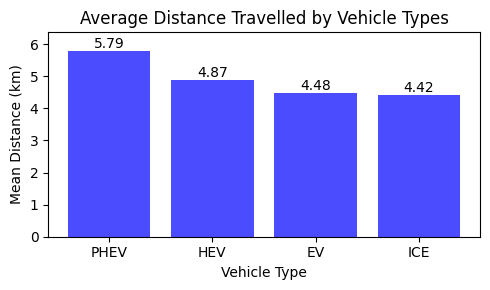

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.bar(df_distance['Vehicle Type'], df_distance['Distance[km]'], alpha=0.7, color= 'blue')
plt.title('Average Distance Travelled by Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Distance (km)')
plt.ylim(0, df_distance['Distance[km]'].max() * 1.1)  # Set y-axis limit to 10% above max distance
# Add text labels on top of the bars
for index, value in enumerate(df_distance['Distance[km]']):
    plt.text(index, value , f"{value:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [36]:
'''
Average HV Battery Voltage Over Time
'''

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and calculate mean HV Battery Voltage
df_eot = df.groupby(df['Date'].dt.to_period('D'))['HV Battery Voltage[V]'].mean().reset_index()
df_eot['Date'] = df_eot['Date'].dt.to_timestamp()
df_eot = df_eot.sort_values(by='Date')
df_eot

,Date,HV Battery Voltage[V]
0,2017-11-01,340.125991
1,2017-11-02,253.911069
2,2017-11-03,259.114447
3,2017-11-04,276.070132
4,2017-11-05,321.144065
...,...,...
149,2018-03-30,261.779422
150,2018-03-31,268.318241
151,2018-04-01,286.188751
152,2018-04-02,233.540929


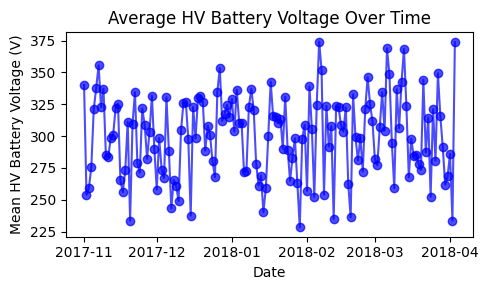

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_eot['Date'], df_eot['HV Battery Voltage[V]'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average HV Battery Voltage Over Time')
plt.xlabel('Date')
plt.ylabel('Mean HV Battery Voltage (V)')
plt.tight_layout()
plt.show()

In [38]:
'''
Average Fuel Rate Over Time
'''

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and calculate mean Fuel Rate
df_eof = df.groupby(df['Date'].dt.to_period('D'))['FCR'].mean().reset_index()
df_eof['Date'] = df_eof['Date'].dt.to_timestamp()
df_eof = df_eof.sort_values(by='Date')
df_eof

,Date,FCR
0,2017-11-01,0.000000
1,2017-11-02,0.687202
2,2017-11-03,0.902463
3,2017-11-04,0.819851
4,2017-11-05,0.744445
...,...,...
149,2018-03-30,1.064590
150,2018-03-31,0.715263
151,2018-04-01,0.757474
152,2018-04-02,0.755047


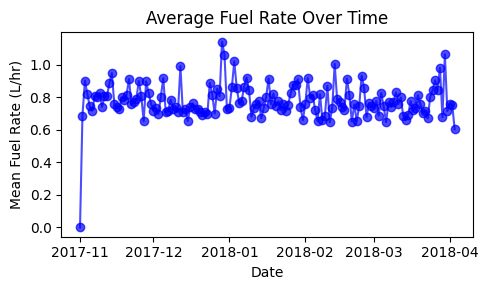

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_eof['Date'], df_eof['FCR'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Fuel Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Fuel Rate (L/hr)')
plt.tight_layout()
plt.show()

In [40]:
'''
Average Trip Count by Location (Heat Map)
'''

df_map = df.groupby(['Latitude[deg]', 'Longitude[deg]','Vehicle Type'])['Trip'].mean().reset_index()
df_map

,Latitude[deg],Longitude[deg],Vehicle Type,Trip
0,42.220305,-83.760323,ICE,1661.0
1,42.220306,-83.767207,HEV,1502.0
2,42.220309,-83.778162,ICE,1659.0
3,42.220316,-83.734527,ICE,1955.0
4,42.220316,-83.760919,ICE,1399.0
...,...,...,...,...
1856224,42.325775,-83.749506,ICE,1983.0
1856225,42.325780,-83.756816,ICE,1983.0
1856226,42.325787,-83.707453,ICE,1183.0
1856227,42.325796,-83.749125,ICE,1089.0


In [41]:
df_map.head()

,Latitude[deg],Longitude[deg],Vehicle Type,Trip
0,42.220305,-83.760323,ICE,1661.0
1,42.220306,-83.767207,HEV,1502.0
2,42.220309,-83.778162,ICE,1659.0
3,42.220316,-83.734527,ICE,1955.0
4,42.220316,-83.760919,ICE,1399.0


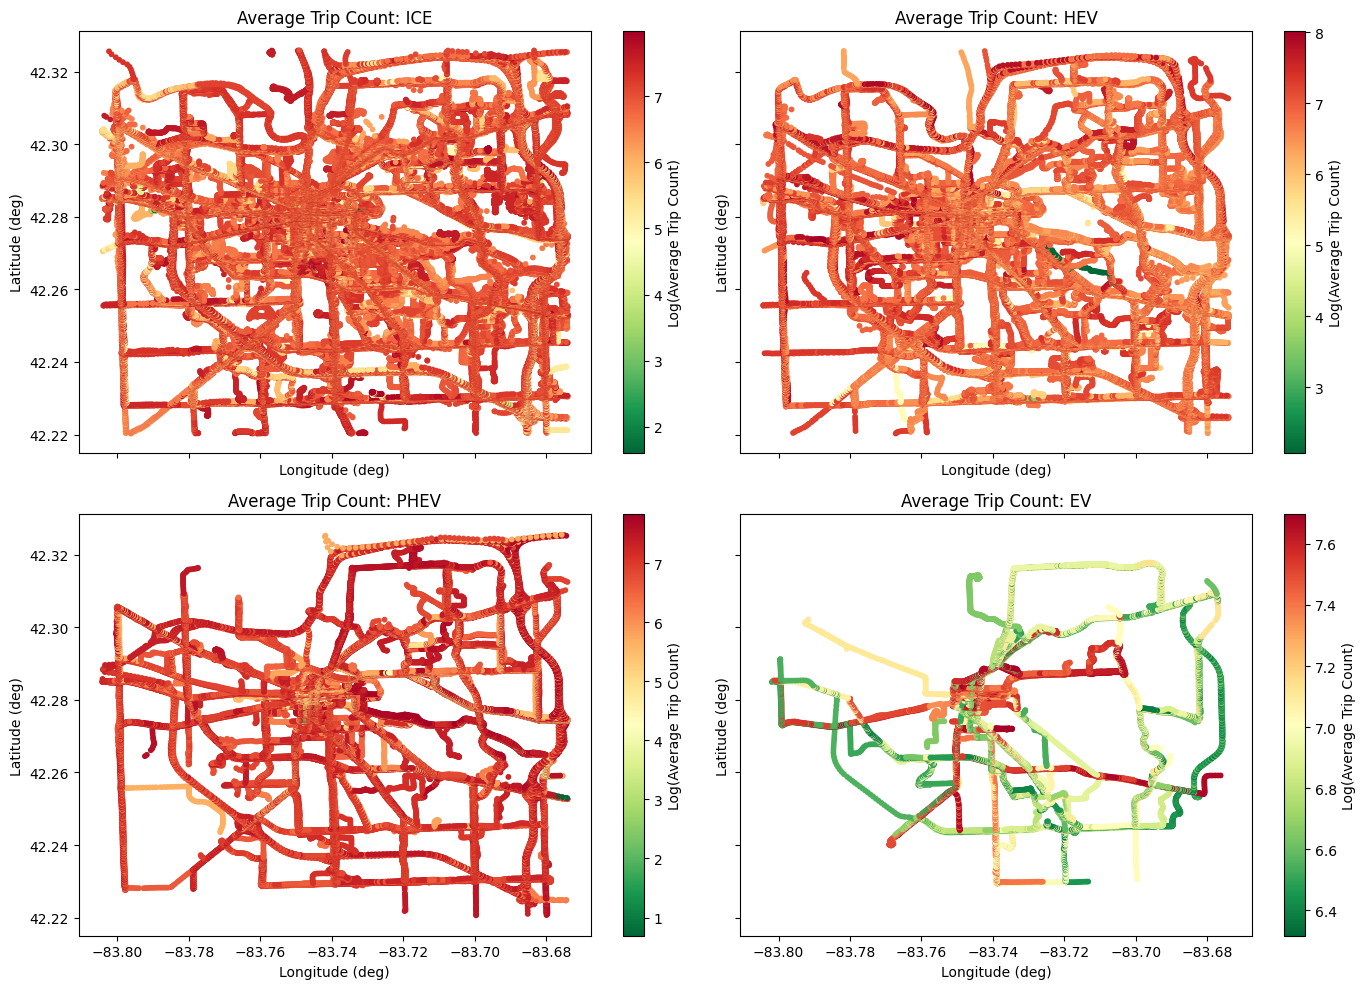

In [42]:
'''
The code visualized the average trip count by location for each vehicle type using a scatter plot on subplots. 
It iterated over unique vehicle types, filtered the data for each type, and plotted longitude and latitude with color representing the logarithm of the average trip count. 
It set subplot titles and axis labels, and added a colorbar for each subplot. 
Finally, it adjusted the layout and displayed the figure.
'''

import matplotlib.pyplot as plt

vehicle_types = df_map['Vehicle Type'].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, vtype in enumerate(vehicle_types):
    ax = axes[idx]
    data = df_map[df_map['Vehicle Type'] == vtype]
    sc = ax.scatter(
        data['Longitude[deg]'],
        data['Latitude[deg]'],
        c=np.log(data['Trip']),
        marker='o',
        s=10,
        cmap='RdYlGn_r'
    )
    ax.set_title(f'Average Trip Count: {vtype}')
    ax.set_xlabel('Longitude (deg)')
    ax.set_ylabel('Latitude (deg)')
    plt.colorbar(sc, ax=ax, label='Log(Average Trip Count)')

plt.tight_layout()
plt.show()


In [43]:
'''
Average Trips Over Time
'''

# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by month and calculate average trips per month
df_trip = df.groupby(df['Date'].dt.to_period('M'))['Trip'].mean().reset_index()
df_trip['Date'] = df_trip['Date'].dt.to_timestamp()
df_trip = df_trip.sort_values(by='Date')
df_trip

,Date,Trip
0,2017-11-01,812.870813
1,2017-12-01,917.432321
2,2018-01-01,1027.306361
3,2018-02-01,1175.387338
4,2018-03-01,1258.388631
5,2018-04-01,1317.635415


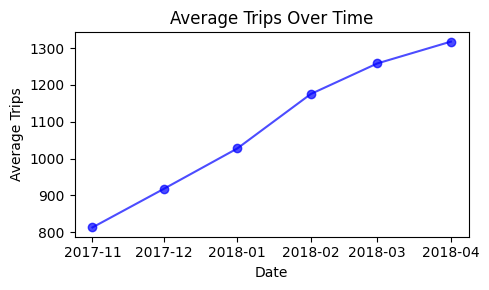

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(df_trip['Date'], df_trip['Trip'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Average Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Average Trips')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

In [45]:
'''
Calculated Power using Voltage and Current: df['HV Battery Power[Watts]'] = df['HV Battery Voltage[V]'] * df['HV Battery Current[A]']
'''

df['HV Battery Power[Watts]'] = df['HV Battery Voltage[V]'] * df['HV Battery Current[A]']

In [46]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) and Battery SOC using the features Battery Power, AC Power, Heater Power with respect to OAT_Category and Vehicle Type
'''

df_SOC = df.groupby(['OAT_Category', 'Vehicle Type'])[
    ['HV Battery Power[Watts]', 'Air Conditioning Power[Watts]', 'Heater Power[Watts]','HV Battery SOC[%]','FCR']
].mean().reset_index().sort_values(by='HV Battery SOC[%]', ascending=False)

df_SOC

,OAT_Category,Vehicle Type,HV Battery Power[Watts],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery SOC[%],FCR
4,Cool,EV,-6315.025345,407.628054,401.791590,78.880645,NaN
12,Mild,EV,-4864.866869,64.395251,141.293594,78.480394,NaN
0,Cold,EV,-7207.394049,524.328587,1493.045840,72.497332,NaN
18,Warm,PHEV,-4609.834834,818.198198,NaN,56.076689,NaN
11,Hot,PHEV,-3295.594514,747.712418,NaN,42.988390,NaN
3,Cold,PHEV,-3308.952767,4.091151,NaN,28.827266,1.588181
9,Extremely Cold,PHEV,-1156.463762,0.000000,NaN,27.144109,5.838999
15,Mild,PHEV,-3634.517430,218.946951,NaN,26.340167,0.676201
7,Cool,PHEV,-3375.550045,24.847430,NaN,25.019190,1.106321
1,Cold,HEV,NaN,NaN,NaN,NaN,0.549312


In [47]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features below with respect to Trip and Vehicle Type
'''

df_EC_trip = df.groupby(['Trip','Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
       ]
].mean().reset_index().sort_values(by=['FCR','HV Battery Power[Watts]'], ascending=False)

df_EC_trip

,Trip,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
737,422,PHEV,42.287141,-83.725580,NaN,NaN,60.795111,0.576187,2334.161290,1.500000,4000.000000,8.519646,5723.351390,NaN,NaN,NaN,NaN,NaN,NaN
503,315,PHEV,42.267723,-83.719078,0.000000,NaN,42.921597,2.772324,504.244681,8.915780,4000.000000,8.167473,-4192.833443,0.710000,NaN,NaN,NaN,NaN,NaN
1049,544,PHEV,42.295950,-83.702473,NaN,NaN,59.629204,1.348090,2188.994924,-3.010152,4000.000000,8.029910,3143.135527,NaN,NaN,NaN,NaN,NaN,NaN
3723,1565,PHEV,42.294440,-83.792688,NaN,NaN,65.545201,8.649201,2108.468750,-18.709821,4000.000000,7.875599,7965.864873,NaN,NaN,NaN,NaN,NaN,NaN
620,368,PHEV,42.281735,-83.718567,0.125392,NaN,38.494302,9.066935,786.875829,-6.256781,3038.577456,7.782446,276.822704,6.275787,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2670,ICE,42.230204,-83.698985,NaN,NaN,68.260870,1.517008,1953.159420,NaN,3500.000000,NaN,NaN,NaN,NaN,3.430707,NaN,3.509964,NaN
5034,2883,ICE,42.276690,-83.681240,NaN,NaN,51.305556,0.746649,1213.638889,7.046296,3500.000000,NaN,NaN,14.180926,27.567175,-1.121238,-9.194155,NaN,NaN
5035,2889,ICE,42.242079,-83.680689,NaN,NaN,40.365625,1.750702,1223.231250,5.400000,3500.000000,NaN,NaN,15.231781,30.715687,-1.086426,-9.291992,NaN,NaN
5036,2898,ICE,42.272055,-83.685443,NaN,NaN,43.899899,5.995511,1215.314459,3.338726,3500.000000,NaN,NaN,15.655702,32.528401,-0.201435,-9.765230,NaN,NaN


In [48]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features below with respect to Date (Month) and Vehicle Type
'''

df_EC_time = df.groupby([df['Date'].dt.to_period('M'), 'Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
].mean().reset_index().sort_values(
    by=['Date', 'FCR', 'HV Battery Power[Watts]'],
)

df_EC_time

,Date,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
1,2017-11,HEV,42.270885,-83.730286,NaN,NaN,43.413799,4.422087,1053.625865,NaN,3213.726498,0.542582,NaN,7.956748,26.756422,-0.672727,0.048961,0.118748,-0.704893
2,2017-11,ICE,42.271662,-83.728795,NaN,NaN,37.604944,4.351819,1384.739340,NaN,3553.919165,0.876889,NaN,12.390124,30.489777,0.372626,-0.100306,1.424386,1.556238
3,2017-11,PHEV,42.276155,-83.724590,107.837861,NaN,40.055765,6.130402,446.089312,5.302876,3606.249474,1.122664,-3639.575620,4.288507,NaN,NaN,NaN,NaN,NaN
0,2017-11,EV,42.270438,-83.729372,385.080724,387.570512,37.845037,5.197760,NaN,4.947384,3500.000000,NaN,-5819.770797,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-12,HEV,42.270560,-83.727416,NaN,NaN,41.474029,5.158407,1091.908296,NaN,3230.512406,0.539653,NaN,7.960814,26.734022,-0.812959,-0.377534,-0.383901,-1.230228
6,2017-12,ICE,42.270985,-83.727754,NaN,NaN,36.485543,4.932551,1370.856595,NaN,3541.763087,0.818075,NaN,11.525376,30.296919,0.432193,-0.373544,1.733919,1.184792
7,2017-12,PHEV,42.272422,-83.724337,8.106811,NaN,38.090622,6.039241,550.119223,-1.480307,3637.054524,1.276928,-3245.157058,5.206778,28.515582,0.624510,NaN,-2.265380,NaN
4,2017-12,EV,42.275912,-83.729516,527.820062,725.497236,38.324684,4.999694,NaN,-0.503159,3500.000000,NaN,-6548.884092,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-01,HEV,42.272277,-83.731813,NaN,NaN,41.960510,4.753501,1160.532423,1.865404,3203.124223,0.564790,NaN,8.364218,29.259980,-0.683583,-0.122051,-0.709057,-1.111838
10,2018-01,ICE,42.270453,-83.730027,NaN,NaN,37.654817,4.324497,1406.320488,2.255533,3480.709759,0.843201,NaN,11.967993,31.730827,0.340978,0.109015,1.030568,1.145690


In [49]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features below with respect to Date and Vehicle Type
'''

df_EC_time = df.groupby([df['Date'].dt.to_period('D'), 'Vehicle Type'])[
    ['Latitude[deg]',
     'Longitude[deg]',
     'Air Conditioning Power[Watts]',
     'Heater Power[Watts]',
     'Vehicle Speed[km/h]',
       'Distance[km]',
       'Engine RPM[RPM]',
       'OAT[DegC]',
       'Generalized_Weight',
       'FCR',
       'HV Battery Power[Watts]',
       'MAF[g/sec]',
       'Absolute Load[%]',
       'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
].mean().reset_index().sort_values(
    by=['Date', 'FCR', 'HV Battery Power[Watts]'],
)

df_EC_time

,Date,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
3,2017-11-01,PHEV,42.278371,-83.731898,423.254438,NaN,34.632641,2.675273,147.130922,8.466505,3724.401426,0.000000,-5329.249002,3.163527,NaN,NaN,NaN,NaN,NaN
0,2017-11-01,EV,42.278134,-83.757882,58.928571,2089.285714,34.581428,0.503022,NaN,5.000000,3500.000000,NaN,-4338.209821,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-01,HEV,42.271430,-83.735358,NaN,NaN,44.235172,3.635668,1014.955255,NaN,3199.366191,NaN,NaN,7.562402,25.968902,NaN,NaN,NaN,NaN
2,2017-11-01,ICE,42.275332,-83.735707,NaN,NaN,32.259101,3.874759,1320.427124,NaN,3540.393564,NaN,NaN,11.650380,29.370518,NaN,NaN,NaN,NaN
7,2017-11-02,PHEV,42.267811,-83.725619,47.353144,NaN,38.296344,6.834930,486.426222,4.270162,3444.920027,0.000000,-2857.820257,4.426551,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2018-04-02,ICE,42.266908,-83.740012,NaN,NaN,41.533589,5.763351,1398.940764,7.849522,3483.278665,0.907605,NaN,12.660379,31.731291,-0.228289,0.060634,1.276508,0.879580
562,2018-04-02,PHEV,42.274750,-83.723151,0.809717,NaN,44.604928,3.000267,706.920571,5.170571,3272.571429,3.659103,-935.198050,5.319922,NaN,NaN,NaN,NaN,NaN
565,2018-04-03,PHEV,42.280450,-83.726182,NaN,NaN,36.928471,2.899305,0.000000,4.621512,3774.527453,0.000000,-8162.208439,NaN,NaN,NaN,NaN,NaN,NaN
563,2018-04-03,HEV,42.288396,-83.737577,NaN,NaN,46.990847,6.099540,1066.613096,2.361616,3282.872734,0.595142,NaN,8.901670,27.338117,-0.695988,-2.955995,0.375059,-1.382212


In [50]:
'''
Data exploration of Battery Power, Fuel Consumption Rate (FCR) using the features Speed, Absolute Load[%], Engine RPM, OAT, Generalized_Weight with respect to Latitude, Longitude and Vehicle Type
'''

df_la_lo = df.groupby(['Latitude[deg]','Longitude[deg]','Vehicle Type'])[
    ['Vehicle Speed[km/h]', 'Absolute Load[%]','Engine RPM[RPM]','OAT[DegC]','Generalized_Weight','FCR','HV Battery Power[Watts]']
].mean().reset_index().sort_values(by=['FCR','HV Battery Power[Watts]'], ascending=False)

df_la_lo


,Latitude[deg],Longitude[deg],Vehicle Type,Vehicle Speed[km/h],Absolute Load[%],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts]
231563,42.243933,-83.734674,ICE,51.000000,NaN,2037.000000,3.0,6500.0,49.700001,NaN
242871,42.244170,-83.718042,ICE,52.000000,NaN,1658.500000,3.0,6500.0,25.250000,NaN
243350,42.244181,-83.717473,ICE,60.000000,NaN,1774.000000,3.0,6500.0,24.350000,NaN
245129,42.244224,-83.716918,ICE,60.000000,NaN,1308.500000,3.0,6500.0,24.350000,NaN
240874,42.244129,-83.718571,ICE,46.333333,NaN,1424.333333,3.0,6500.0,20.716667,NaN
...,...,...,...,...,...,...,...,...,...,...
1856114,42.325111,-83.748894,ICE,80.000000,NaN,1367.800000,NaN,5000.0,NaN,NaN
1856131,42.325151,-83.748901,ICE,85.500000,74.509804,1689.000000,NaN,4500.0,NaN,NaN
1856189,42.325349,-83.748998,ICE,97.857143,NaN,1640.000000,NaN,5000.0,NaN,NaN
1856193,42.325380,-83.748911,ICE,90.833333,NaN,1527.666667,NaN,5000.0,NaN,NaN


In [51]:
'''
ICE, HEV, EV and PHEV Analysis (Distance vs FCR and HV Battery Power[Watts]
'''

df_EC_trip_ICE_HEV = df_EC_trip[df_EC_trip['Vehicle Type'].isin(['ICE','HEV'])]
df_EC_trip_EV_PHEV = df_EC_trip[df_EC_trip['Vehicle Type'].isin(['EV','PHEV'])]

df_EC_time_ICE_HEV = df_EC_time[df_EC_time['Vehicle Type'].isin(['ICE','HEV'])]
df_EC_time_EV_PHEV = df_EC_time[df_EC_time['Vehicle Type'].isin(['EV','PHEV'])]


In [52]:
for i in df_EC_trip_ICE_HEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_EC_trip_ICE_HEV[i].unique())
    print(df_EC_trip_ICE_HEV[i].value_counts())

Unique values in column 'Trip':
[2628 2645 2648 ... 2889 2898 2928]
Trip
107     2
639     2
160     2
340     2
1800    2
       ..
2549    1
2546    1
2542    1
2531    1
2519    1
Name: count, Length: 2316, dtype: int64
Unique values in column 'Vehicle Type':
['ICE' 'HEV']
Vehicle Type
ICE    2200
HEV    1586
Name: count, dtype: int64
Unique values in column 'Latitude[deg]':
[42.29362649 42.27365438 42.25314284 ... 42.24207904 42.27205511
 42.25453229]
Latitude[deg]
42.254532    1
42.293626    1
42.273654    1
42.253143    1
42.305868    1
            ..
42.256033    1
42.275071    1
42.259447    1
42.278615    1
42.298313    1
Name: count, Length: 3786, dtype: int64
Unique values in column 'Longitude[deg]':
[-83.73190393 -83.74155843 -83.73935583 ... -83.68068876 -83.68544342
 -83.68235187]
Longitude[deg]
-83.682352    1
-83.731904    1
-83.741558    1
-83.739356    1
-83.734312    1
             ..
-83.712491    1
-83.741150    1
-83.739479    1
-83.739980    1
-83.727332    1
Nam

In [53]:
for i in df_EC_trip_EV_PHEV.columns:
    print(f"Unique values in column '{i}':")
    print(df_EC_trip_EV_PHEV[i].unique())
    print(df_EC_trip_EV_PHEV[i].value_counts())

Unique values in column 'Trip':
[ 422  315  544 ... 1651  706 1779]
Trip
575     2
625     2
1198    2
1009    2
1615    2
       ..
779     1
1022    1
948     1
596     1
1565    1
Name: count, Length: 1174, dtype: int64
Unique values in column 'Vehicle Type':
['PHEV' 'EV']
Vehicle Type
PHEV    1072
EV       192
Name: count, dtype: int64
Unique values in column 'Latitude[deg]':
[42.28714052 42.26772324 42.29594973 ... 42.28599205 42.23178769
 42.26242699]
Latitude[deg]
42.253724    1
42.264457    1
42.250996    1
42.256739    1
42.263710    1
            ..
42.281735    1
42.294440    1
42.295950    1
42.267723    1
42.287141    1
Name: count, Length: 1264, dtype: int64
Unique values in column 'Longitude[deg]':
[-83.72558023 -83.71907758 -83.70247277 ... -83.75801275 -83.75688737
 -83.69414626]
Longitude[deg]
-83.739821    1
-83.797908    1
-83.798650    1
-83.739577    1
-83.691512    1
             ..
-83.718567    1
-83.792688    1
-83.702473    1
-83.719078    1
-83.725580    1
N

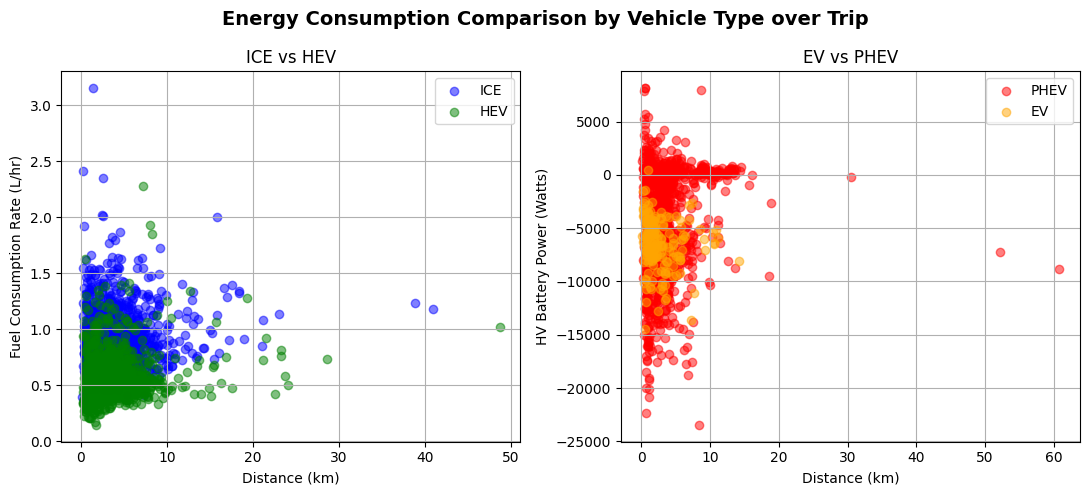

In [54]:
'''
Created Scatter plots to show Energy Consumption Comparison by Vehicle Type by Trip
Distance vs FCR for ICE and HEV
Distance vs HV Battery Power[Watts] for EV and PHEV
'''

import matplotlib.pyplot as plt

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False)

# ---------- Subplot 1: ICE vs HEV ----------
ax1 = axes[0]
ax1.scatter(
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']['Distance[km]'],
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']['FCR'],
    alpha=0.5,
    c='blue',
    label='ICE'
)
ax1.scatter(
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']['Distance[km]'],
    df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']['FCR'],
    alpha=0.5,
    c='green',
    label='HEV'
)
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Fuel Consumption Rate (L/hr)')
ax1.set_title('ICE vs HEV')
ax1.legend()
ax1.grid(True)

# ---------- Subplot 2: EV vs PHEV ----------
ax2 = axes[1]
ax2.scatter(
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']['Distance[km]'],
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='red',
    label='PHEV'
)
ax2.scatter(
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']['Distance[km]'],
    df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='orange',
    label='EV'
)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('HV Battery Power (Watts)')
ax2.set_title('EV vs PHEV')
ax2.legend()
ax2.grid(True)

# ---------- Shared Title ----------
fig.suptitle('Energy Consumption Comparison by Vehicle Type over Trip', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for suptitle
plt.show()


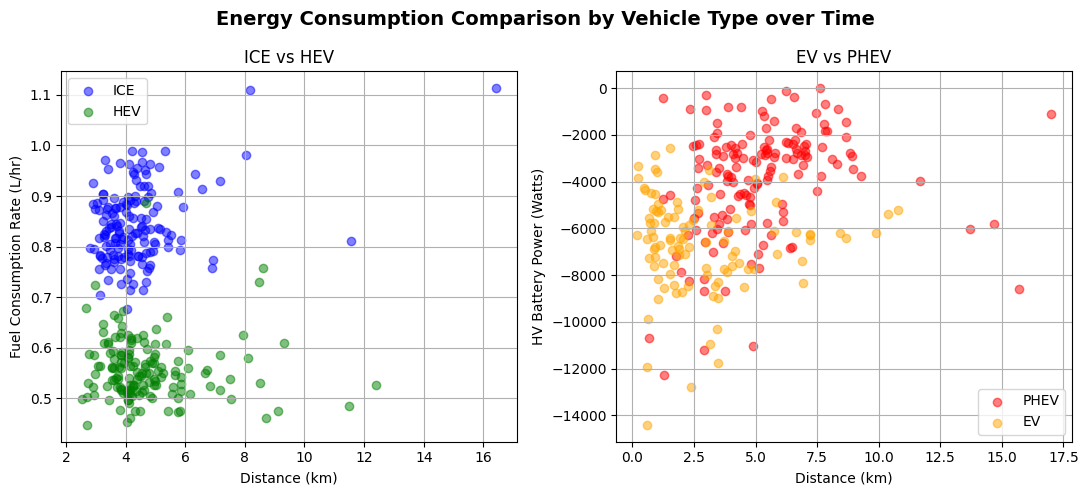

In [55]:
'''
Created Scatter plots to show Energy Consumption Comparison by Vehicle Type over Time
Distance vs FCR for ICE and HEV
Distance vs HV Battery Power[Watts] for EV and PHEV
'''

import matplotlib.pyplot as plt

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False)

# ---------- Subplot 1: ICE vs HEV ----------
ax1 = axes[0]
ax1.scatter(
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']['Distance[km]'],
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']['FCR'],
    alpha=0.5,
    c='blue',
    label='ICE'
)
ax1.scatter(
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']['Distance[km]'],
    df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']['FCR'],
    alpha=0.5,
    c='green',
    label='HEV'
)
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Fuel Consumption Rate (L/hr)')
ax1.set_title('ICE vs HEV')
ax1.legend()
ax1.grid(True)

# ---------- Subplot 2: EV vs PHEV ----------
ax2 = axes[1]
ax2.scatter(
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']['Distance[km]'],
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='red',
    label='PHEV'
)
ax2.scatter(
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']['Distance[km]'],
    df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']['HV Battery Power[Watts]'],
    alpha=0.5,
    c='orange',
    label='EV'
)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('HV Battery Power (Watts)')
ax2.set_title('EV vs PHEV')
ax2.legend()
ax2.grid(True)

# ---------- Shared Title ----------
fig.suptitle('Energy Consumption Comparison by Vehicle Type over Time', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for suptitle
plt.show()


In [56]:
'''
Individual Vehicle Type analysis by Trip: df_ICE, df_HEV, df_EV, df_PHEV
'''

# Run for trip
df_ICE = df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'ICE']
df_HEV = df_EC_trip_ICE_HEV[df_EC_trip_ICE_HEV['Vehicle Type'] == 'HEV']
df_EV = df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'EV']
df_PHEV = df_EC_trip_EV_PHEV[df_EC_trip_EV_PHEV['Vehicle Type'] == 'PHEV']


In [441]:
'''
Individual Vehicle Type analysis by Time: df_ICE, df_HEV, df_EV, df_PHEV


# Run for time
df_ICE = df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'ICE']
df_HEV = df_EC_time_ICE_HEV[df_EC_time_ICE_HEV['Vehicle Type'] == 'HEV']
df_EV = df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'EV']
df_PHEV = df_EC_time_EV_PHEV[df_EC_time_EV_PHEV['Vehicle Type'] == 'PHEV']

'''

In [57]:
'''
Handled Missing values as it is required during Regression
'''

# show the columns with missing values in df_ICE and df_HEV

missing_values = df_ICE.isnull().sum()
print("\nMissing values in ICE Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_HEV.isnull().sum()
print("\nMissing values in HEV Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_EV.isnull().sum()
print("\nMissing values in EV Vehicles:")
print(missing_values[missing_values > 0])

missing_values = df_PHEV.isnull().sum()
print("\nMissing values in PHEV Vehicles:")
print(missing_values[missing_values > 0])



Missing values in ICE Vehicles:
Air Conditioning Power[Watts]     2200
Heater Power[Watts]               2200
OAT[DegC]                         1025
Generalized_Weight                 105
FCR                                153
HV Battery Power[Watts]           2200
MAF[g/sec]                         167
Absolute Load[%]                   103
Short Term Fuel Trim Bank 1[%]      44
Short Term Fuel Trim Bank 2[%]     690
Long Term Fuel Trim Bank 1[%]       51
Long Term Fuel Trim Bank 2[%]      707
dtype: int64

Missing values in HEV Vehicles:
Air Conditioning Power[Watts]     1586
Heater Power[Watts]               1586
OAT[DegC]                          599
FCR                                 51
HV Battery Power[Watts]           1586
MAF[g/sec]                           6
Absolute Load[%]                     6
Short Term Fuel Trim Bank 1[%]      36
Short Term Fuel Trim Bank 2[%]    1368
Long Term Fuel Trim Bank 1[%]       45
Long Term Fuel Trim Bank 2[%]     1392
dtype: int64

Missing va

In [58]:
df_ICE.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,2200.000000,2200.000000,2200.000000,0.0,0.0,2200.000000,2200.000000,2200.000000,1175.000000,2095.000000,2047.000000,0.0,2033.000000,2097.000000,2156.000000,1510.000000,2149.000000,1493.000000
mean,1194.488636,42.270459,-83.729158,NaN,NaN,38.513763,3.544566,1415.909895,1.676151,3472.837328,0.868315,NaN,12.367785,31.397375,0.368556,-0.252839,1.463076,1.240369
std,689.257253,0.012903,0.021687,NaN,NaN,10.335123,2.679785,194.666395,6.077748,480.131643,0.222176,NaN,3.401966,4.454647,1.621927,3.676007,3.343251,3.720074
min,5.000000,42.228171,-83.800113,NaN,NaN,0.986688,0.059206,650.157400,-30.611236,2500.000000,0.365122,NaN,5.273529,17.912852,-5.815972,-77.315070,-13.831522,-10.548753
25%,616.750000,42.262612,-83.740633,NaN,NaN,32.668991,2.136476,1307.395549,-2.000000,3168.519599,0.727863,NaN,10.324110,28.696029,-0.501707,-1.100772,-0.376688,-1.168705
50%,1167.500000,42.270864,-83.728508,NaN,NaN,37.639794,3.036812,1394.249014,1.497778,3500.000000,0.834765,NaN,11.743765,30.957374,0.108277,-0.333328,1.352447,0.975177
75%,1731.250000,42.278191,-83.716456,NaN,NaN,43.273612,4.259150,1495.901316,5.255294,3714.145658,0.961126,NaN,13.574757,33.667582,0.986104,0.403827,3.248159,3.426966
max,2928.000000,42.316908,-83.679590,NaN,NaN,92.988889,40.980174,2793.723608,28.986928,5500.000000,3.154674,NaN,43.106750,55.477125,13.543159,25.615986,26.718750,20.027608


In [59]:
df_HEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,1586.000000,1586.000000,1586.000000,0.0,0.0,1586.000000,1586.000000,1586.000000,987.000000,1586.000000,1535.000000,0.0,1580.000000,1580.000000,1550.000000,218.000000,1541.000000,194.000000
mean,1090.000000,42.271435,-83.734765,NaN,NaN,43.516727,3.634765,1084.958824,1.869060,3241.805101,0.568199,NaN,8.346108,27.441848,-0.665138,0.014865,-0.270709,-1.529164
std,609.153997,0.014667,0.026042,NaN,NaN,9.671531,2.893226,229.100779,4.949470,369.860546,0.180528,NaN,2.579728,7.993945,1.191142,1.586888,2.048271,2.079918
min,8.000000,42.229036,-83.799807,NaN,NaN,10.932011,0.219721,130.172414,-13.918182,2000.000000,0.146293,NaN,2.197069,3.995943,-7.801827,-8.290480,-8.780185,-7.181490
25%,620.250000,42.262241,-83.750433,NaN,NaN,38.085168,1.937783,932.077829,-1.320829,3000.000000,0.464805,NaN,6.881587,23.848746,-1.181007,-0.589859,-1.615162,-2.996934
50%,1023.500000,42.273207,-83.731305,NaN,NaN,42.976737,3.167409,1078.741121,1.928058,3151.434960,0.533781,NaN,7.857364,26.945488,-0.570376,-0.017066,-0.317004,-1.493183
75%,1442.500000,42.281704,-83.715739,NaN,NaN,48.347727,4.595484,1235.755318,5.199352,3480.243613,0.624716,NaN,9.188845,30.106458,-0.080356,0.549279,0.939150,-0.395683
max,3012.000000,42.313205,-83.679651,NaN,NaN,96.187342,48.698232,2311.650206,17.283828,5000.000000,2.281641,NaN,32.731645,147.530296,8.016304,4.535953,10.465228,4.164043


In [60]:
df_PHEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,1072.000000,1072.000000,1072.000000,814.000000,0.0,1072.000000,1072.000000,1072.000000,1071.000000,1072.000000,417.000000,1071.000000,815.000000,2.000000,2.000000,0.0,2.000000,0.0
mean,1068.349813,42.273535,-83.724487,31.458010,NaN,42.361808,3.771616,480.276407,1.181418,3778.348617,1.300838,-4719.160889,4.607863,14.257791,0.312255,NaN,-2.304565,NaN
std,595.376940,0.018781,0.024099,132.029855,NaN,11.850411,3.752166,460.683247,6.448809,382.654582,1.901255,5010.223152,3.781798,20.163562,0.441595,NaN,0.055416,NaN
min,2.000000,42.229924,-83.799773,0.000000,NaN,11.558719,0.037676,0.000000,-20.871176,3000.000000,0.000000,-23445.889629,0.170000,0.000000,0.000000,NaN,-2.343750,NaN
25%,591.750000,42.259781,-83.739367,0.000000,NaN,35.242796,1.734695,0.000000,-2.789850,3635.765692,0.000000,-8077.407714,0.870000,7.128896,0.156128,NaN,-2.324158,NaN
50%,1027.500000,42.277576,-83.721872,0.000000,NaN,41.526763,3.064417,465.831741,2.016129,4000.000000,0.000000,-4522.882512,4.708703,14.257791,0.312255,NaN,-2.304565,NaN
75%,1505.250000,42.285169,-83.708786,0.000000,NaN,47.297805,4.449652,791.785924,5.460185,4000.000000,2.236468,-152.108369,6.801281,21.386687,0.468383,NaN,-2.284973,NaN
max,2497.000000,42.318748,-83.677901,1854.489437,NaN,101.218062,60.774807,3360.000000,26.222477,4000.000000,8.519646,8125.363238,40.230000,28.515582,0.624510,NaN,-2.265380,NaN


In [61]:
# Handle missing values

df_ICE.fillna({
    'OAT[DegC]': 15,
    'Generalized_Weight': df_ICE['Generalized_Weight'].mean(),
    'FCR': df_ICE['FCR'].mean(),
    'HV Battery Power[Watts]': 0.0,  # ICE vehicles typically do not have HV Battery Power
    'Air Conditioning Power[Watts]' : 0,
    'Heater Power[Watts]': df_ICE['Heater Power[Watts]'].mean(),
    'MAF[g/sec]': df_ICE['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_ICE['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_ICE['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': df_ICE['Short Term Fuel Trim Bank 2[%]'].mean(),
    'Long Term Fuel Trim Bank 1[%]': df_ICE['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': df_ICE['Long Term Fuel Trim Bank 2[%]'].mean()
}, inplace=True)

df_HEV.fillna({
    'OAT[DegC]': 15,
    'FCR': df_HEV['FCR'].mean(),
    'HV Battery Power[Watts]': 0,
    'Air Conditioning Power[Watts]': 0,
    'Heater Power[Watts]': 0,
    'MAF[g/sec]': df_HEV['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_HEV['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_HEV['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': df_HEV['Short Term Fuel Trim Bank 2[%]'].mean(),
    'Long Term Fuel Trim Bank 1[%]': df_HEV['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': df_HEV['Long Term Fuel Trim Bank 2[%]'].mean()
}, inplace=True)

df_EV.fillna({
    'Engine RPM[RPM]': 0,  # EVs typically do not have engine RPM
    'FCR': 0,  # EVs typically do not have fuel consumption rate  
    'MAF[g/sec]': 0,
    'Absolute Load[%]': 0,
    'Short Term Fuel Trim Bank 1[%]': 0,
    'Short Term Fuel Trim Bank 2[%]': 0,
    'Long Term Fuel Trim Bank 1[%]': 0,
    'Long Term Fuel Trim Bank 2[%]': 0
}, inplace=True)

df_PHEV.fillna({
    'OAT[DegC]': 15,
    'FCR': df_PHEV['FCR'].mean(),
    'HV Battery Power[Watts]': 0.0,  # PHEVs typically do not have HV Battery Power
    'Air Conditioning Power[Watts]': 0,
    'Heater Power[Watts]': 0,
    'MAF[g/sec]': df_PHEV['MAF[g/sec]'].mean(),
    'Absolute Load[%]': df_PHEV['Absolute Load[%]'].mean(),
    'Short Term Fuel Trim Bank 1[%]': df_PHEV['Short Term Fuel Trim Bank 1[%]'].mean(),
    'Short Term Fuel Trim Bank 2[%]': 0,
    'Long Term Fuel Trim Bank 1[%]': df_PHEV['Long Term Fuel Trim Bank 1[%]'].mean(),
    'Long Term Fuel Trim Bank 2[%]': 0
}, inplace=True)


In [62]:
"""
Created a function to Perform linear regression using given features and target.
Prints model coefficients, regression equation, and evaluation metrics.
Returns:
    model: Trained linear regression model.
    X_test, y_test: Test data for further analysis.
    y_pred: Predictions on test set.
    regression_line_model: Model for plotting Actual vs Predicted regression line.
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def linear_regression_analysis(features, target, X, y):

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print model coefficients
    print("Model Coefficients:")
    for feature, coef in zip(features, model.coef_):
        print(f"  {feature}: {coef:.4f}")

    # Print regression equation
    equation = " + ".join([f"{coef:.4f}*{feature}" for feature, coef in zip(features, model.coef_)])
    print(f"\nRegression Equation:")
    print(f"  Slope of the regression line: {model.coef_}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  Target Variable: {target}")
    print(f"  {target} = {equation} + {model.intercept_:.4f}\n")

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Evaluation Metrics:")
    print(f"  R² Score  : {r2:.4f}")
    print(f"  MAE       : {mae:.4f}")
    print(f"  MSE       : {mse:.4f}")
    print(f"  RMSE      : {rmse:.4f}\n")

    # Regression line for plotting (optional)
    regression_line_model = LinearRegression()
    regression_line_model.fit(y_test.values.reshape(-1, 1), y_pred)

    return model, X_test, y_test, y_pred, regression_line_model


# Linear Regression to Predict Energy Consumption in ICE, HEV, EV and PHEV Vehicles

Model Coefficients:
  Vehicle Speed[km/h]: 0.0091
  Distance[km]: -0.0006

Regression Equation:
  Slope of the regression line: [ 0.00906548 -0.00058008]
  Intercept: 0.5228
  Target Variable: FCR
  FCR = 0.0091*Vehicle Speed[km/h] + -0.0006*Distance[km] + 0.5228

Evaluation Metrics:
  R² Score  : 0.3076
  MAE       : 0.1219
  MSE       : 0.0269
  RMSE      : 0.1642



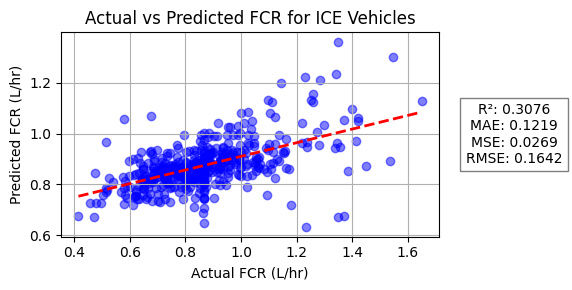

In [63]:
"""
Scenario 1 for ICE
Performed linear regression analysis to predict FCR for ICE vehicles using 'Vehicle Speed[km/h]' and 'Distance[km]' as features.
Trained the model and obtained predictions on the test set.
Plotted Actual vs Predicted FCR values and the regression line.
Displayed evaluation metrics (R², MAE, MSE, RMSE) on the plot.
"""

#features = ['Vehicle Speed[km/h]','Distance[km]', 'Engine RPM[RPM]']
features = ['Vehicle Speed[km/h]','Distance[km]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
X = df_ICE[features]
print(X.head())
y = df_ICE[target]
print(y.head())

      Vehicle Speed[km/h]  Distance[km]
4973            44.100000      1.374661
4983            24.263889      0.254705
4986            36.552916      2.555786
5000            30.005076      2.493146
3888            45.045161      2.559252
4973    3.154674
4983    2.411606
4986    2.353453
5000    2.021139
3888    2.015042
Name: FCR, dtype: float64


In [65]:
param = [model, X_test, y_test, y_pred, regression_line_model, y_test_sorted, y_line]

# print the value of the param variable using for loop

for i, value in enumerate(param):
    print(f"Parameter {i}: {value}")
    print()  # Add a newline for better readability

Parameter 0: LinearRegression()

Parameter 1:       Vehicle Speed[km/h]  Distance[km]
811             36.136471      3.386172
3176            34.923423      2.114701
2033            32.450601      2.304397
74              43.938017      2.014322
1555            30.492299      4.225037
...                   ...           ...
4109            36.339744      2.091850
442             49.194937      9.278854
2846            25.014901      0.859650
283             25.878238      1.149311
4943            51.938679      2.424305

[440 rows x 2 columns]

Parameter 2: 811     0.745959
3176    0.771333
2033    0.673333
74      0.679211
1555    0.720144
          ...   
4109    1.383293
442     1.345334
2846    0.613525
283     0.582152
4943    0.969332
Name: FCR, Length: 440, dtype: float64

Parameter 3: [0.84839099 0.83813169 0.81560433 0.91991154 0.79673725 0.86722887
 0.83994283 0.84380366 0.86159589 0.89090103 0.91910744 0.76802593
 0.99579399 0.78682127 0.74058429 0.9718213  0.7625944  0.8645

Model Coefficients:
  Latitude[deg]: 0.3966
  Longitude[deg]: 0.3935
  Vehicle Speed[km/h]: 0.0076
  Distance[km]: -0.0022
  Engine RPM[RPM]: 0.0002
  OAT[DegC]: 0.0013
  Generalized_Weight: 0.0002

Regression Equation:
  Slope of the regression line: [ 3.96637813e-01  3.93531578e-01  7.62270412e-03 -2.19456742e-03
  1.60310069e-04  1.34480393e-03  1.78382168e-04]
  Intercept: 15.9109
  Target Variable: FCR
  FCR = 0.3966*Latitude[deg] + 0.3935*Longitude[deg] + 0.0076*Vehicle Speed[km/h] + -0.0022*Distance[km] + 0.0002*Engine RPM[RPM] + 0.0013*OAT[DegC] + 0.0002*Generalized_Weight + 15.9109

Evaluation Metrics:
  R² Score  : 0.4843
  MAE       : 0.1028
  MSE       : 0.0201
  RMSE      : 0.1417



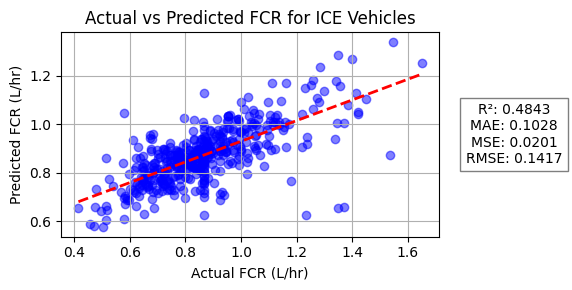

In [66]:
"""
Scenario 2 for ICE
Performed linear regression analysis using selected features to predict FCR for ICE vehicles.
Plotted Actual vs Predicted FCR values and regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

features = ['Latitude[deg]','Longitude[deg]','Vehicle Speed[km/h]','Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  Vehicle Speed[km/h]: 0.0077
  Distance[km]: -0.0021
  Engine RPM[RPM]: 0.0002
  OAT[DegC]: 0.0013
  Generalized_Weight: 0.0002

Regression Equation:
  Slope of the regression line: [ 0.00767829 -0.00211231  0.00015705  0.00125734  0.00017501]
  Intercept: -0.2587
  Target Variable: FCR
  FCR = 0.0077*Vehicle Speed[km/h] + -0.0021*Distance[km] + 0.0002*Engine RPM[RPM] + 0.0013*OAT[DegC] + 0.0002*Generalized_Weight + -0.2587

Evaluation Metrics:
  R² Score  : 0.4905
  MAE       : 0.1022
  MSE       : 0.0198
  RMSE      : 0.1408



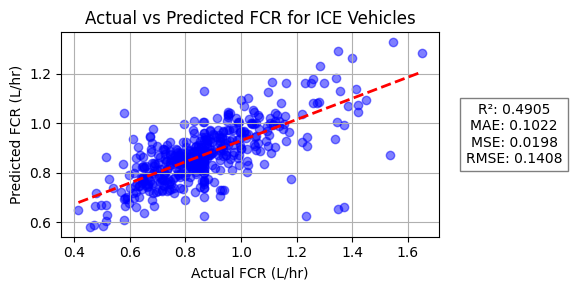

In [67]:
"""
Scenario 3 for ICE
Performed linear regression analysis using selected features to predict FCR for ICE vehicles.
Plotted Actual vs Predicted FCR values and regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight']
#features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  Vehicle Speed[km/h]: 0.0029
  Distance[km]: -0.0010
  Generalized_Weight: 0.0001
  MAF[g/sec]: 0.0485
  Absolute Load[%]: 0.0035
  Short Term Fuel Trim Bank 1[%]: -0.0022
  Short Term Fuel Trim Bank 2[%]: 0.0013
  Long Term Fuel Trim Bank 1[%]: 0.0083
  Long Term Fuel Trim Bank 2[%]: 0.0022

Regression Equation:
  Slope of the regression line: [ 2.91205095e-03 -9.71297358e-04  5.07330125e-05  4.85228489e-02
  3.47002551e-03 -2.23791788e-03  1.25872051e-03  8.26195897e-03
  2.21058683e-03]
  Intercept: -0.1387
  Target Variable: FCR
  FCR = 0.0029*Vehicle Speed[km/h] + -0.0010*Distance[km] + 0.0001*Generalized_Weight + 0.0485*MAF[g/sec] + 0.0035*Absolute Load[%] + -0.0022*Short Term Fuel Trim Bank 1[%] + 0.0013*Short Term Fuel Trim Bank 2[%] + 0.0083*Long Term Fuel Trim Bank 1[%] + 0.0022*Long Term Fuel Trim Bank 2[%] + -0.1387

Evaluation Metrics:
  R² Score  : 0.6106
  MAE       : 0.0635
  MSE       : 0.0152
  RMSE      : 0.1231



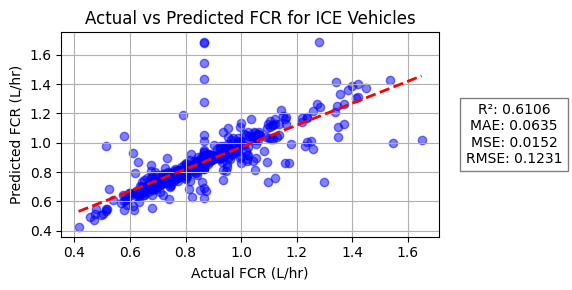

In [68]:
"""
Scenario 4 for ICE
Performed linear regression analysis using selected features to predict FCR for ICE vehicles.
Used features: Vehicle Speed[km/h], Distance[km], Generalized_Weight, MAF[g/sec], Absolute Load[%], Short Term Fuel Trim Bank 1[%], Short Term Fuel Trim Bank 2[%], Long Term Fuel Trim Bank 1[%], Long Term Fuel Trim Bank 2[%].
Plotted Actual vs Predicted FCR values and regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

#features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Engine RPM[RPM]', 'OAT[DegC]', 'Generalized_Weight','MAF[g/sec]',
#                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
#       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
#       'Long Term Fuel Trim Bank 2[%]']
features = ['Vehicle Speed[km/h]', 'Distance[km]', 'Generalized_Weight','MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]']
target = 'FCR'
X = df_ICE[features]
y = df_ICE[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Plotted the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for ICE Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  MAF[g/sec]: 0.0664

Regression Equation:
  Slope of the regression line: [0.06642316]
  Intercept: 0.0140
  Target Variable: FCR
  FCR = 0.0664*MAF[g/sec] + 0.0140

Evaluation Metrics:
  R² Score  : 0.9238
  MAE       : 0.0216
  MSE       : 0.0018
  RMSE      : 0.0429



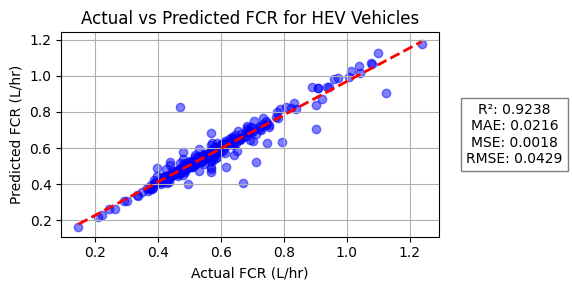

In [69]:
"""
Scenario 1 for HEV
Performed linear regression analysis for HEV vehicles using 'MAF[g/sec]' as the feature and 'FCR' as the target.
Trained the model and generated predictions on the test set.
Plotted Actual vs Predicted FCR values and the regression line.
Displayed evaluation metrics: R², MAE, MSE, and RMSE on the plot.
"""

'''
features = ['Vehicle Speed[km/h]',
             'Distance[km]',
               'Engine RPM[RPM]',
                 'OAT[DegC]',
                   'Generalized_Weight',
                   'HV Battery Power[Watts]',
                   'MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
       'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]',
       'Long Term Fuel Trim Bank 2[%]'
                   ]
'''
'''
features = ['Vehicle Speed[km/h]',
             'Distance[km]',
                   'Generalized_Weight',
                   'MAF[g/sec]',
                   'Absolute Load[%]', 'Short Term Fuel Trim Bank 1[%]',
        'Long Term Fuel Trim Bank 1[%]'
                   ]
'''



features = [
    'MAF[g/sec]'
]

target = 'FCR'
X = df_HEV[features]
y = df_HEV[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted FCR for HEV Vehicles')
plt.xlabel('Actual FCR (L/hr)')
plt.ylabel('Predicted FCR (L/hr)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
'''
Created a function to handle outliers using IQR
'''

def handle_outliers_iqr(df, columns, method='cap'):
    """
    Detects and handles outliers in specified columns using the IQR method.
    Adds boolean columns for outlier flags and modifies outliers in place.
    method: 'cap' (default) replaces outliers with nearest bound, 'remove' drops outlier rows.
    Returns the modified DataFrame.
    """
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_flag = (df[col] < lower) | (df[col] > upper)
        df[f'{col}_outlier'] = outlier_flag
        if method == 'cap':
            df.loc[df[col] < lower, col] = lower
            df.loc[df[col] > upper, col] = upper
        elif method == 'remove':
            df = df[~outlier_flag]
    return df

# Example usage for EV outliers (capping outliers)
outlier_columns = ['Air Conditioning Power[Watts]','Heater Power[Watts]','Vehicle Speed[km/h]','HV Battery Power[Watts]']
df_EV_clean = handle_outliers_iqr(df_EV, outlier_columns, method='cap')
df_EV_clean.head()

,Trip,Vehicle Type,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],...,MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%],Air Conditioning Power[Watts]_outlier,Heater Power[Watts]_outlier,Vehicle Speed[km/h]_outlier,HV Battery Power[Watts]_outlier
1072,554,EV,42.244061,-83.736726,111.184211,187.500000,48.529999,0.927557,0.0,11.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True
1097,565,EV,42.243105,-83.721433,0.000000,0.000000,53.631999,0.519562,0.0,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
2780,1175,EV,42.254807,-83.725073,471.176471,528.431373,8.471024,0.184437,0.0,2.817647,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False
2689,1143,EV,42.244349,-83.732306,0.000000,0.000000,56.034837,0.544876,0.0,15.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
1509,719,EV,42.244535,-83.718833,260.483871,152.419355,27.739903,1.526925,0.0,8.159677,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False


Model Coefficients:
  Air Conditioning Power[Watts]: -1.8823
  Heater Power[Watts]: -1.4577
  Vehicle Speed[km/h]: -105.0709

Regression Equation:
  Slope of the regression line: [  -1.88227038   -1.45771702 -105.07093857]
  Intercept: -643.8252
  Target Variable: HV Battery Power[Watts]
  HV Battery Power[Watts] = -1.8823*Air Conditioning Power[Watts] + -1.4577*Heater Power[Watts] + -105.0709*Vehicle Speed[km/h] + -643.8252

Evaluation Metrics:
  R² Score  : 0.2818
  MAE       : 1254.0961
  MSE       : 2513009.7469
  RMSE      : 1585.2475



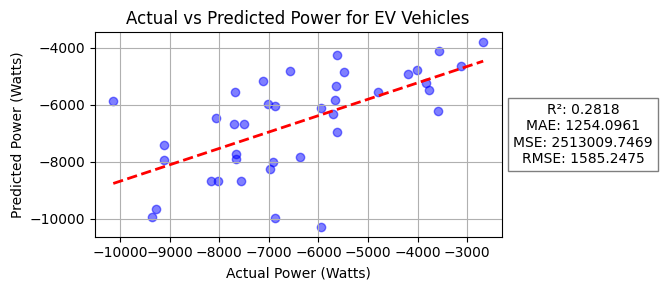

In [71]:
'''
Scenario 1 for EV
Selected features for linear regression analysis to predict HV Battery Power for EVs.
Performed linear regression using the selected features and target.
Plotted Actual vs Predicted Power for EV vehicles, including regression line and evaluation metrics (R², MAE, MSE, RMSE).
'''

'''
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight']
'''

'''
features = [
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]']
'''

features = [
    'Air Conditioning Power[Watts]',
    'Heater Power[Watts]',
    'Vehicle Speed[km/h]',
]

target = 'HV Battery Power[Watts]'
X = df_EV[features]
y = df_EV[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Power for EV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(
    1.20, 0.5,
    f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
    fontsize=10, ha='center', va='center', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.grid(True)
plt.tight_layout()
plt.show()

Model Coefficients:
  Air Conditioning Power[Watts]: -1.5130
  Heater Power[Watts]: -1.6000
  Vehicle Speed[km/h]: -99.5030

Regression Equation:
  Slope of the regression line: [ -1.51298951  -1.60004374 -99.50303112]
  Intercept: -969.1184
  Target Variable: HV Battery Power[Watts]
  HV Battery Power[Watts] = -1.5130*Air Conditioning Power[Watts] + -1.6000*Heater Power[Watts] + -99.5030*Vehicle Speed[km/h] + -969.1184

Evaluation Metrics:
  R² Score  : 0.3029
  MAE       : 1248.3314
  MSE       : 2439329.3342
  RMSE      : 1561.8352



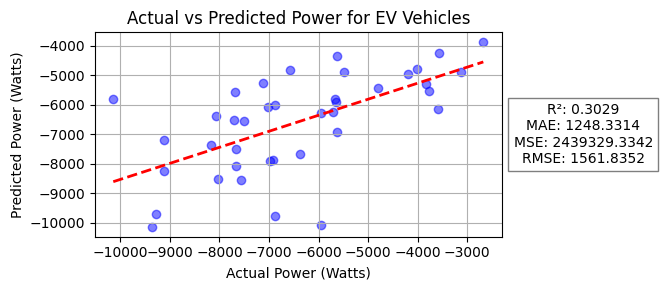

In [72]:
'''
Scenario 2 for EV without outliers
'''

'''
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight']
'''

'''
features = [
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]']
'''


features = [
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            ]


target = 'HV Battery Power[Watts]'
X = df_EV_clean[features]
y = df_EV_clean[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

# plotting the results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
#plot the regression line
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Power for EV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(1.20, 0.5, f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
         fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
df_EV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,192.000000,192.0,192.0,192.000000,192.0,192.0,192.0,192.0,192.0,192.0
mean,1312.286458,42.271497,-83.735299,457.753092,758.677578,37.601938,2.633718,0.0,1.682723,3500.0,0.0,-6523.042672,0.0,0.0,0.0,0.0,0.0,0.0
std,520.314309,0.016914,0.021729,387.748865,953.331492,11.567310,2.456442,0.0,6.019795,0.0,0.0,2324.714219,0.0,0.0,0.0,0.0,0.0,0.0
min,554.000000,42.231426,-83.796345,0.000000,0.000000,3.446784,0.132661,0.0,-14.455868,3500.0,0.0,-14409.176136,0.0,0.0,0.0,0.0,0.0,0.0
25%,822.750000,42.261343,-83.746096,75.323201,0.000000,30.326173,0.927085,0.0,-2.080354,3500.0,0.0,-7680.062309,0.0,0.0,0.0,0.0,0.0,0.0
50%,1177.000000,42.272274,-83.737289,389.670273,424.481066,36.819866,1.797607,0.0,2.000000,3500.0,0.0,-6503.715555,0.0,0.0,0.0,0.0,0.0,0.0
75%,1805.000000,42.284359,-83.724456,783.016172,1000.000000,44.896273,3.430748,0.0,5.145057,3500.0,0.0,-4900.811702,0.0,0.0,0.0,0.0,0.0,0.0
max,2200.000000,42.308496,-83.679000,1530.806452,3911.167513,67.251182,14.155463,0.0,15.165680,3500.0,0.0,482.351974,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_PHEV.describe()

,Trip,Latitude[deg],Longitude[deg],Air Conditioning Power[Watts],Heater Power[Watts],Vehicle Speed[km/h],Distance[km],Engine RPM[RPM],OAT[DegC],Generalized_Weight,FCR,HV Battery Power[Watts],MAF[g/sec],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.0,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0,1072.000000,1072.0
mean,1068.349813,42.273535,-83.724487,23.886959,0.0,42.361808,3.771616,480.276407,1.194308,3778.348617,1.300838,-4714.758687,4.607863,14.257791,0.312255,0.0,-2.304565,0.0
std,595.376940,0.018781,0.024099,115.817200,0.0,11.850411,3.752166,460.683247,6.459601,382.654582,1.184929,5009.957336,3.296976,0.616130,0.013494,0.0,0.001693,0.0
min,2.000000,42.229924,-83.799773,0.000000,0.0,11.558719,0.037676,0.000000,-20.871176,3000.000000,0.000000,-23445.889629,0.170000,0.000000,0.000000,0.0,-2.343750,0.0
25%,591.750000,42.259781,-83.739367,0.000000,0.0,35.242796,1.734695,0.000000,-2.776627,3635.765692,1.115816,-8076.683138,1.736842,14.257791,0.312255,0.0,-2.304565,0.0
50%,1027.500000,42.277576,-83.721872,0.000000,0.0,41.526763,3.064417,465.831741,2.016203,4000.000000,1.300838,-4519.362083,4.607863,14.257791,0.312255,0.0,-2.304565,0.0
75%,1505.250000,42.285169,-83.708786,0.000000,0.0,47.297805,4.449652,791.785924,5.473130,4000.000000,1.300838,-145.980815,6.140789,14.257791,0.312255,0.0,-2.304565,0.0
max,2497.000000,42.318748,-83.677901,1854.489437,0.0,101.218062,60.774807,3360.000000,26.222477,4000.000000,8.519646,8125.363238,40.230000,28.515582,0.624510,0.0,-2.265380,0.0


Model Coefficients:
  Engine RPM[RPM]: 8.8037
  Air Conditioning Power[Watts]: -0.5881
  Vehicle Speed[km/h]: -198.5269
  OAT[DegC]: 144.6615

Regression Equation:
  Slope of the regression line: [   8.80374758   -0.58811294 -198.5268572   144.66146801]
  Intercept: -774.3902
  Target Variable: HV Battery Power[Watts]
  HV Battery Power[Watts] = 8.8037*Engine RPM[RPM] + -0.5881*Air Conditioning Power[Watts] + -198.5269*Vehicle Speed[km/h] + 144.6615*OAT[DegC] + -774.3902

Evaluation Metrics:
  R² Score  : 0.7958
  MAE       : 1826.8574
  MSE       : 5089293.0695
  RMSE      : 2255.9462



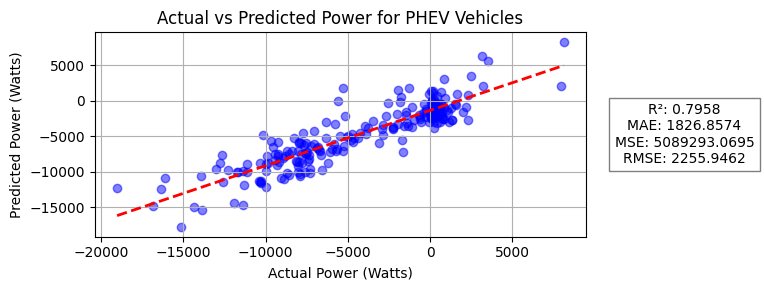

In [75]:
'''
Scenario 1 for PHEV
Selected features and target for linear regression analysis on PHEV data.
Performed linear regression using the selected features to predict HV Battery Power.
Plotted Actual vs Predicted Power for PHEV vehicles, including regression line and evaluation metrics (R², MAE, MSE, RMSE).
'''

'''
features = ['Latitude[deg]',
            'Longitude[deg]',
            'Engine RPM[RPM]',
            'Air Conditioning Power[Watts]',
            'Heater Power[Watts]',
            'Vehicle Speed[km/h]',
            'Distance[km]',
            'OAT[DegC]',
            'Generalized_Weight',
            ]
'''

features = [
    'Engine RPM[RPM]',
    'Air Conditioning Power[Watts]',
    'Vehicle Speed[km/h]',
    'OAT[DegC]',
]

target = 'HV Battery Power[Watts]'
X = df_PHEV[features]
y = df_PHEV[target]
model, X_test, y_test, y_pred, regression_line_model = linear_regression_analysis(features, target, X, y)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_test_sorted = np.sort(y_test)
y_line = regression_line_model.predict(y_test_sorted.reshape(-1, 1))

plt.figure(figsize=(8, 3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test_sorted, y_line, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.title('Actual vs Predicted Power for PHEV Vehicles')
plt.xlabel('Actual Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.text(
    1.20, 0.5,
    f'R²: {r2_score(y_test, y_pred):.4f}\nMAE: {mean_absolute_error(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.4f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
    fontsize=10, ha='center', va='center', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
)
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example features and target
features = ['Vehicle Speed[km/h]', 'Distance[km]']
target = 'FCR'

X = df_ICE[features]
y = df_ICE[target]

# Standardize features (optional but helps SHAP with linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'shap'

# K means Clustering Classification models to categorize vehicle type

In [76]:
'''
This cell will be used to perform K-means clustering classification models to categorize vehicle type.
The following steps will be performed:
1. Concatenate the dataframes for different vehicle types (ICE, HEV, PHEV, EV) into a single dataframe.
2. Prepare different feature sets for clustering, such as:
   - Trip and FCR
   - Vehicle Speed and FCR
   - Vehicle Speed and HV Battery Power
   - OAT and FCR
   - OAT and HV Battery Power
3. These feature sets will be used for K-means clustering and visualization in subsequent cells.
'''

# Concatenate df_ICE, df_HEV, df_PHEV, df_EV
print("ICE")
print(df_ICE.head(),"\n")
print("HEV")
print(df_HEV.head(),"\n")
print("PHEV")
print(df_PHEV.head(),"\n")
print("EV")
print(df_EV.head(),"\n")

ICE
      Trip Vehicle Type  Latitude[deg]  Longitude[deg]  \
4973  2628          ICE      42.293626      -83.731904   
4983  2645          ICE      42.273654      -83.741558   
4986  2648          ICE      42.253143      -83.739356   
5000  2678          ICE      42.254663      -83.739791   
3888  1637          ICE      42.287384      -83.701779   

      Air Conditioning Power[Watts]  Heater Power[Watts]  Vehicle Speed[km/h]  \
4973                            0.0                  NaN            44.100000   
4983                            0.0                  NaN            24.263889   
4986                            0.0                  NaN            36.552916   
5000                            0.0                  NaN            30.005076   
3888                            0.0                  NaN            45.045161   

      Distance[km]  Engine RPM[RPM]  OAT[DegC]  Generalized_Weight       FCR  \
4973      1.374661      1552.068750  15.000000         3472.837328  3.154674   


In [77]:
df_combined = pd.concat([df_ICE, df_HEV, df_PHEV, df_EV], ignore_index=True)

In [78]:
df_combined_k = df_combined[['Trip','FCR']]

In [79]:
df_combined_sf = df_combined[['Vehicle Speed[km/h]','FCR']]

In [80]:
df_combined_sb = df_combined[['Vehicle Speed[km/h]','HV Battery Power[Watts]']]

In [81]:
df_combined_of = df_combined[['OAT[DegC]','FCR']]

In [82]:
df_combined_ob = df_combined[['OAT[DegC]','HV Battery Power[Watts]']]

In [83]:
'''
This cell:
- Imports necessary libraries: numpy, matplotlib.pyplot, and KMeans from sklearn.
- Defines a function `plot_kmeans_elbow` that:
    - Computes KMeans clustering inertia for cluster counts from 1 to 4.
    - Calculates the difference in inertia to suggest an optimal number of clusters (elbow point).
    - Prints the suggested optimal K.
    - Plots the inertia values (elbow curve) to visually assist in selecting the optimal number of clusters.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_elbow(df):
    """
    Plots the elbow curve for KMeans clustering to help select the optimal number of clusters.
    
    Args:
        df (pd.DataFrame): DataFrame containing the features for clustering.
    """
    inertia = []
    for i in range(1, 5):
        kmeans = KMeans(n_clusters=i, init='random', random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    # Find elbow point (simple method: where the decrease in inertia slows down the most)
    diff = np.diff(inertia)
    elbow_k = np.argmin(diff) + 2  # +2 because diff is one less and we start from k=1
    print("Suggested optimal K:", elbow_k)   

    # Plot the elbow curve
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, 5), inertia, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K Selection')
    plt.grid(True)
    plt.show()


Suggested optimal K: 2


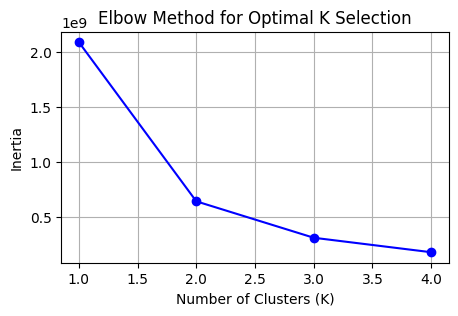

In [84]:
plot_kmeans_elbow(df_combined_k)

In [85]:
'''
This cell:
- Imports KMeans from sklearn.
- Defines a function `fit_predict_kmeans` that:
    - Fits KMeans clustering to the input DataFrame with a specified number of clusters.
    - Predicts cluster labels for the input data.
    - Adds a new 'Cluster' column to the DataFrame with the assigned cluster labels.
    - Returns the modified DataFrame, the predicted cluster labels, and the fitted KMeans object.
'''

from sklearn.cluster import KMeans

def fit_predict_kmeans(df, n_clusters, random_state=42):
    """
    Fits KMeans clustering on the given DataFrame and returns a copy with a new 'Cluster' column.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame (features only, no target).
        n_clusters (int): Number of clusters to use.
        random_state (int): Random state for reproducibility.
        
    Returns:
        pd.DataFrame: A copy of the input DataFrame with an added 'Cluster' column.
        np.ndarray: The predicted cluster labels.
        KMeans: The fitted KMeans object.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(df)
    pred = kmeans.predict(df)
    df['Cluster'] = kmeans.labels_
    return df, pred, kmeans

# Example usage:
# df_with_clusters, cluster_labels, kmeans_model = fit_predict_kmeans(df, elbow_k)

In [86]:
fit_predict_kmeans(df_combined_k, 4)

(      Trip       FCR  Cluster
 0     2628  3.154674        1
 1     2645  2.411606        1
 2     2648  2.353453        1
 3     2678  2.021139        1
 4     1637  2.015042        2
 ...    ...       ...      ...
 5045  1996  0.000000        1
 5046   728  0.000000        0
 5047  1674  0.000000        2
 5048   596  0.000000        3
 5049  1026  0.000000        0
 
 [5050 rows x 3 columns],
 array([1, 1, 1, ..., 2, 3, 0], shape=(5050,), dtype=int32),
 KMeans(n_clusters=4, random_state=42))

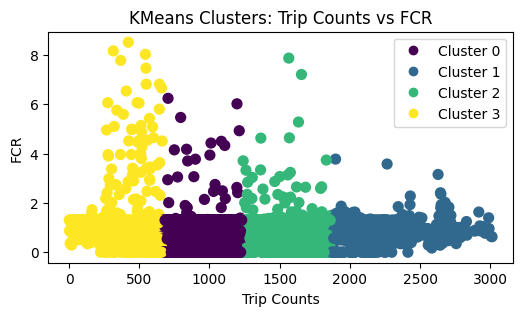

In [88]:
'''
This cell:
- Creates a scatter plot of 'Trip' vs 'FCR' from df_combined_k.
- Colors the points by their assigned KMeans cluster using the 'Cluster' column.
- Sets axis labels and a title.
- Adds a legend for the clusters.
- Displays the plot.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_k['Trip'],
    df_combined_k['FCR'],
    c=df_combined_k['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Trip Counts')
plt.ylabel('FCR')
plt.title('KMeans Clusters: Trip Counts vs FCR')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

Suggested optimal K: 2


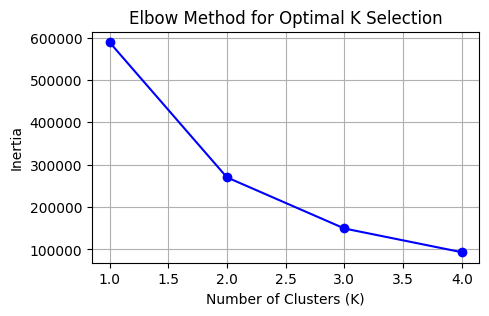

In [89]:
plot_kmeans_elbow(df_combined_sf)

In [90]:
fit_predict_kmeans(df_combined_sf,4)

(      Vehicle Speed[km/h]       FCR  Cluster
 0               44.100000  3.154674        1
 1               24.263889  2.411606        3
 2               36.552916  2.353453        0
 3               30.005076  2.021139        3
 4               45.045161  2.015042        1
 ...                   ...       ...      ...
 5045            44.174461  0.000000        1
 5046            64.811233  0.000000        2
 5047            38.361678  0.000000        0
 5048            63.285435  0.000000        2
 5049            58.763749  0.000000        2
 
 [5050 rows x 3 columns],
 array([1, 3, 0, ..., 0, 2, 2], shape=(5050,), dtype=int32),
 KMeans(n_clusters=4, random_state=42))

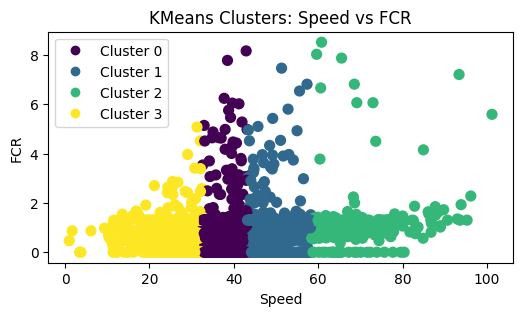

In [91]:
'''
This cell:
- Creates a scatter plot of 'Vehicle Speed[km/h]' vs 'FCR' from df_combined_sf.
- Colors the points by their assigned KMeans cluster using the 'Cluster' column.
- Sets axis labels and a title.
- Adds a legend for the clusters.
- Displays the plot.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_sf['Vehicle Speed[km/h]'],
    df_combined_sf['FCR'],
    c=df_combined_sf['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Speed')
plt.ylabel('FCR')
plt.title('KMeans Clusters: Speed vs FCR')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

In [92]:
df_combined_sf = df_combined[['Vehicle Type','Vehicle Speed[km/h]','FCR']]
df_combined_sf.head()

,Vehicle Type,Vehicle Speed[km/h],FCR
0,ICE,44.100000,3.154674
1,ICE,24.263889,2.411606
2,ICE,36.552916,2.353453
3,ICE,30.005076,2.021139
4,ICE,45.045161,2.015042


In [93]:
'''
This cell:
- Maps the 'Vehicle Type' column in df_combined_sf from string labels ('ICE', 'HEV', 'EV', 'PHEV')
  to numeric codes (0, 1, 2, 3) for further analysis or modeling.
'''

df_combined_sf['Vehicle Type'] = df_combined_sf['Vehicle Type'].map({'ICE': 0, 'HEV': 1, 'EV': 2, 'PHEV': 3})

Suggested optimal K: 2


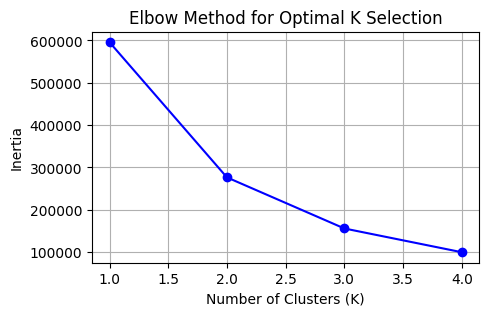

In [94]:
plot_kmeans_elbow(df_combined_sf)

In [95]:
fit_predict_kmeans(df_combined_sf,3)

(      Vehicle Type  Vehicle Speed[km/h]       FCR  Cluster
 0                0            44.100000  3.154674        0
 1                0            24.263889  2.411606        2
 2                0            36.552916  2.353453        2
 3                0            30.005076  2.021139        2
 4                0            45.045161  2.015042        0
 ...            ...                  ...       ...      ...
 5045             2            44.174461  0.000000        0
 5046             2            64.811233  0.000000        1
 5047             2            38.361678  0.000000        0
 5048             2            63.285435  0.000000        1
 5049             2            58.763749  0.000000        1
 
 [5050 rows x 4 columns],
 array([0, 2, 2, ..., 0, 1, 1], shape=(5050,), dtype=int32),
 KMeans(n_clusters=3, random_state=42))

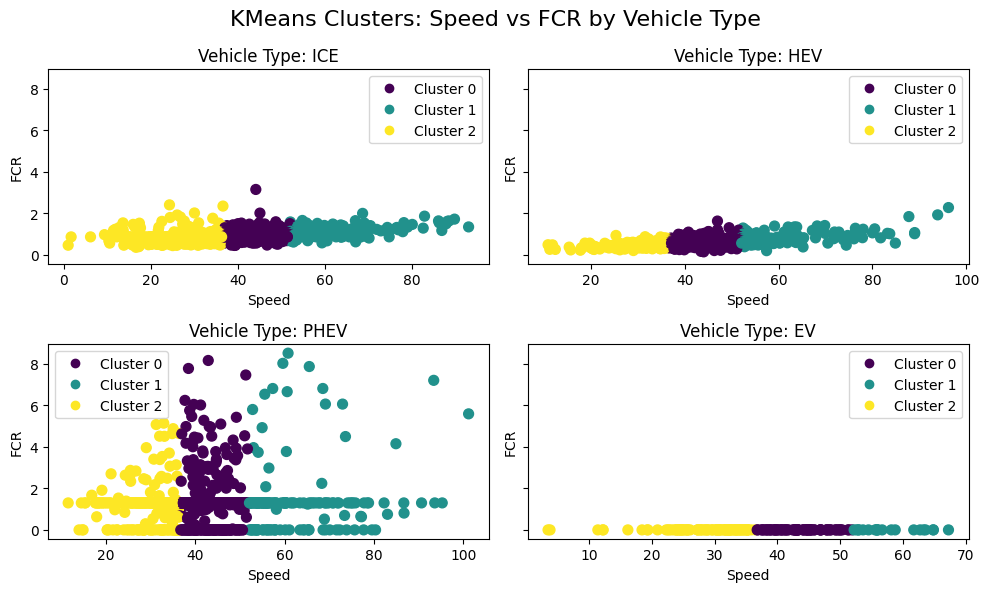

In [96]:
'''
This code:
- Imports matplotlib for plotting.
- Gets the unique vehicle types from the dataframe.
- Creates a 2x2 grid of subplots for visualizing each vehicle type.
- Iterates over each vehicle type, filtering the dataframe for that type.
- Plots a scatter plot of Speed vs FCR for each vehicle type, colored by cluster.
- Maps numeric vehicle type codes back to string labels for subplot titles.
- Sets axis labels and adds a legend for clusters in each subplot.
- Sets a common title for the figure and adjusts layout.
- Displays the plot.
'''

import matplotlib.pyplot as plt

vehicle_types = df_combined_sf['Vehicle Type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
axes = axes.flatten()

for i, vtype in enumerate(vehicle_types):
    ax = axes[i]
    subset = df_combined_sf[df_combined_sf['Vehicle Type'] == vtype]
    scatter = ax.scatter(
        subset['Vehicle Speed[km/h]'],
        subset['FCR'],
        c=subset['Cluster'],
        cmap='viridis',
        s=50
    )
    # Map numeric vehicle type back to string for title
    vtype_str = {0: "ICE", 1: "HEV", 2: "EV", 3: "PHEV"}.get(vtype, str(vtype))
    ax.set_title(f'Vehicle Type: {vtype_str}')
    ax.set_xlabel('Speed')
    ax.set_ylabel('FCR')
    handles, labels = scatter.legend_elements(prop="colors")
    ax.legend(handles, [f"Cluster {i}" for i in range(len(handles))])

fig.suptitle('KMeans Clusters: Speed vs FCR by Vehicle Type', fontsize=16)
plt.tight_layout()
plt.show()

Suggested optimal K: 2


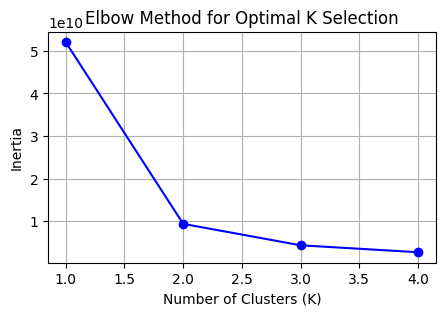

In [97]:
plot_kmeans_elbow(df_combined_sb)

In [98]:
fit_predict_kmeans(df_combined_sb,3)

(      Vehicle Speed[km/h]  HV Battery Power[Watts]  Cluster
 0               44.100000                 0.000000        0
 1               24.263889                 0.000000        0
 2               36.552916                 0.000000        0
 3               30.005076                 0.000000        0
 4               45.045161                 0.000000        0
 ...                   ...                      ...      ...
 5045            44.174461            -11747.988095        2
 5046            64.811233            -11926.910494        2
 5047            38.361678            -12802.824627        2
 5048            63.285435            -13596.112057        2
 5049            58.763749            -14409.176136        2
 
 [5050 rows x 3 columns],
 array([0, 0, 0, ..., 2, 2, 2], shape=(5050,), dtype=int32),
 KMeans(n_clusters=3, random_state=42))

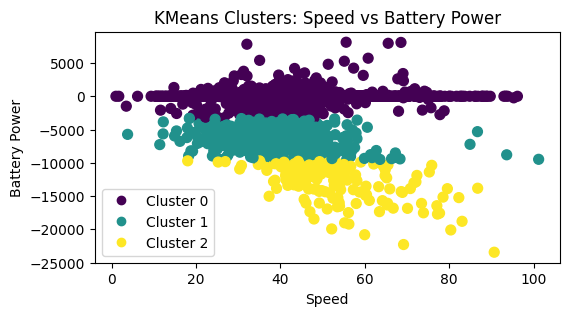

In [99]:
'''
- Creates a scatter plot of Vehicle Speed vs HV Battery Power, colored by KMeans cluster assignment.
- Sets axis labels and plot title.
- Adds a legend for the clusters.
- Displays the plot.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_sb['Vehicle Speed[km/h]'],
    df_combined_sb['HV Battery Power[Watts]'],
    c=df_combined_sb['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Speed')
plt.ylabel('Battery Power')
plt.title('KMeans Clusters: Speed vs Battery Power')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

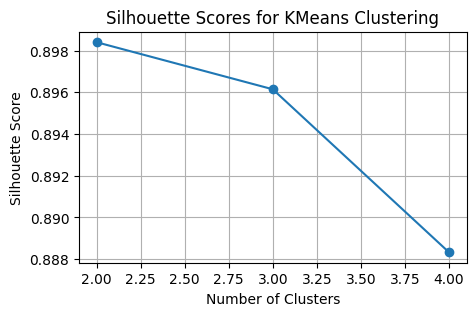

In [100]:
'''
This code calculates the silhouette score for KMeans clustering on the features
'Vehicle Speed[km/h]' and 'HV Battery Power[Watts]' from the dataframe df_combined_sb.
- It iterates over a range of cluster numbers (2 to 10).
- For each number of clusters, it fits a KMeans model and computes the silhouette score.
- The silhouette score measures how well each data point fits within its cluster (higher is better).
- Finally, it plots the silhouette scores against the number of clusters to help select the optimal cluster count.
'''

# Calculate silhouette score for each cluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calculate silhouette score for each cluster
silhouette_scores = []
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_combined_sb[['Vehicle Speed[km/h]', 'HV Battery Power[Watts]']])
    labels = kmeans.labels_
    score = silhouette_score(df_combined_sb[['Vehicle Speed[km/h]', 'HV Battery Power[Watts]']], labels)
    silhouette_scores.append((n_clusters, score))
    
# Plot silhouette scores
plt.figure(figsize=(5, 3))
plt.plot([score[0] for score in silhouette_scores], [score[1] for score in silhouette_scores], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.grid(True)
plt.show() 

In [101]:
df_combined_sb = df_combined[['Vehicle Type','Vehicle Speed[km/h]','HV Battery Power[Watts]']]
# map vehicle type to 0,1,2,3
df_combined_sb['Vehicle Type'] = df_combined_sb['Vehicle Type'].map({'ICE': 0, 'HEV': 1, 'EV': 2, 'PHEV': 3})

df_combined_sb.head()

,Vehicle Type,Vehicle Speed[km/h],HV Battery Power[Watts]
0,0,44.100000,0.0
1,0,24.263889,0.0
2,0,36.552916,0.0
3,0,30.005076,0.0
4,0,45.045161,0.0


Suggested optimal K: 2


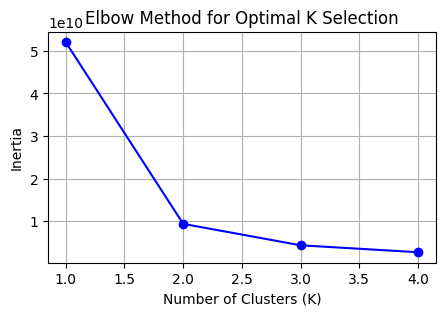

(      Vehicle Type  Vehicle Speed[km/h]  HV Battery Power[Watts]  Cluster
 0                0            44.100000                 0.000000        0
 1                0            24.263889                 0.000000        0
 2                0            36.552916                 0.000000        0
 3                0            30.005076                 0.000000        0
 4                0            45.045161                 0.000000        0
 ...            ...                  ...                      ...      ...
 5045             2            44.174461            -11747.988095        2
 5046             2            64.811233            -11926.910494        2
 5047             2            38.361678            -12802.824627        2
 5048             2            63.285435            -13596.112057        2
 5049             2            58.763749            -14409.176136        2
 
 [5050 rows x 4 columns],
 array([0, 0, 0, ..., 2, 2, 2], shape=(5050,), dtype=int32),
 KMeans(n_c

In [102]:
plot_kmeans_elbow(df_combined_sb)
fit_predict_kmeans(df_combined_sb,3)

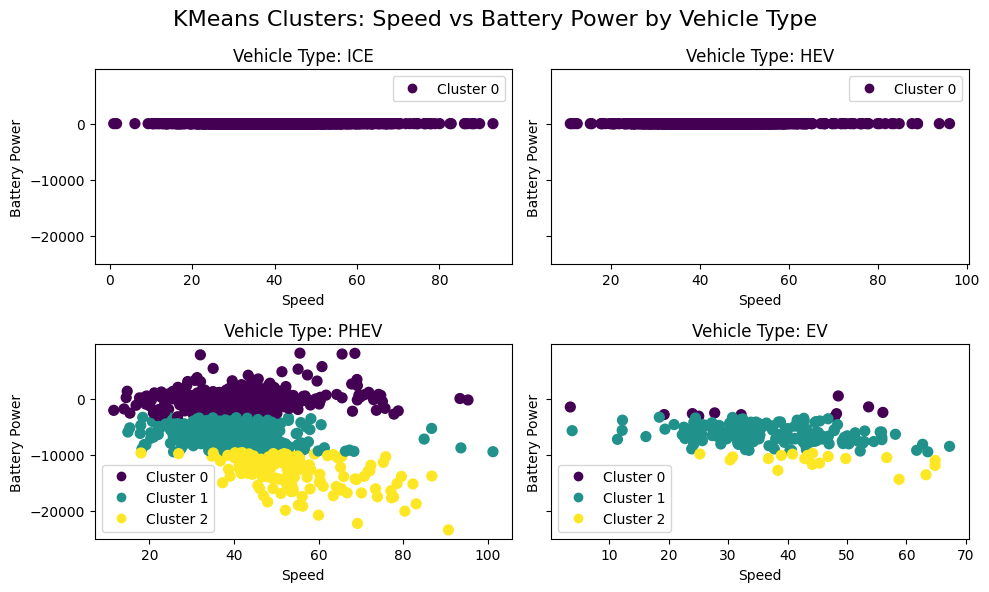

In [103]:
'''
This code creates a 2x2 grid of scatter plots, one for each vehicle type, showing the relationship between 'Vehicle Speed[km/h]' and 'HV Battery Power[Watts]' for each type. 
- It iterates over unique vehicle types, selects the corresponding subset of data, and plots the points colored by their KMeans cluster assignment.
- The numeric vehicle type is mapped back to a string for the plot title.
- Each subplot includes a legend for the clusters.
- The overall figure is titled and laid out neatly.
'''

import matplotlib.pyplot as plt

vehicle_types = df_combined_sf['Vehicle Type'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
axes = axes.flatten()

for i, vtype in enumerate(vehicle_types):
    ax = axes[i]
    subset = df_combined_sb[df_combined_sb['Vehicle Type'] == vtype]
    scatter = ax.scatter(
        subset['Vehicle Speed[km/h]'],
        subset['HV Battery Power[Watts]'],
        c=subset['Cluster'],
        cmap='viridis',
        s=50
    )
    # Map numeric vehicle type back to string for title
    vtype_str = {0: "ICE", 1: "HEV", 2: "EV", 3: "PHEV"}.get(vtype, str(vtype))
    ax.set_title(f'Vehicle Type: {vtype_str}')
    ax.set_xlabel('Speed')
    ax.set_ylabel('Battery Power')
    handles, labels = scatter.legend_elements(prop="colors")
    ax.legend(handles, [f"Cluster {i}" for i in range(len(handles))])

fig.suptitle('KMeans Clusters: Speed vs Battery Power by Vehicle Type', fontsize=16)
plt.tight_layout()
plt.show()

In [104]:
df_combined_sb

,Vehicle Type,Vehicle Speed[km/h],HV Battery Power[Watts],Cluster
0,0,44.100000,0.000000,0
1,0,24.263889,0.000000,0
2,0,36.552916,0.000000,0
3,0,30.005076,0.000000,0
4,0,45.045161,0.000000,0
...,...,...,...,...
5045,2,44.174461,-11747.988095,2
5046,2,64.811233,-11926.910494,2
5047,2,38.361678,-12802.824627,2
5048,2,63.285435,-13596.112057,2


Suggested optimal K: 2


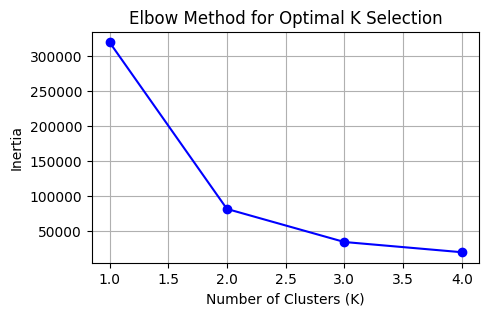

(      OAT[DegC]       FCR  Cluster
 0     15.000000  3.154674        0
 1     15.000000  2.411606        0
 2     15.000000  2.353453        0
 3     15.000000  2.021139        0
 4     -7.046392  2.015042        3
 ...         ...       ...      ...
 5045   3.156085  0.000000        1
 5046   6.500000  0.000000        2
 5047   1.246269  0.000000        1
 5048  -5.041553  0.000000        4
 5049  -2.659091  0.000000        4
 
 [5050 rows x 3 columns],
 array([0, 0, 0, ..., 1, 4, 4], shape=(5050,), dtype=int32),
 KMeans(n_clusters=5, random_state=42))

In [105]:
plot_kmeans_elbow(df_combined_of)
fit_predict_kmeans(df_combined_of,5)

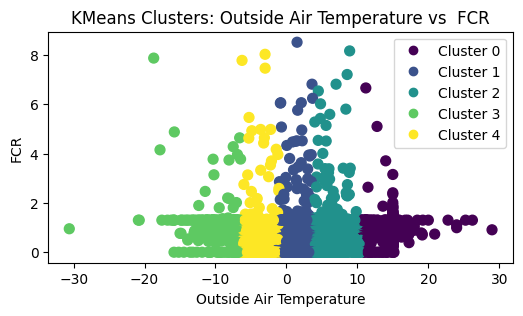

In [106]:
'''
This code creates a scatter plot to visualize KMeans clustering results.
- It plots 'OAT[DegC]' (Outside Air Temperature) vs 'FCR', coloring points by their cluster assignment.
- The color map 'viridis' is used for cluster coloring.
- The plot includes axis labels, a title, and a legend indicating cluster numbers.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_of['OAT[DegC]'],
    df_combined_of['FCR'],
    c=df_combined_of['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Outside Air Temperature')
plt.ylabel('FCR')
plt.title('KMeans Clusters: Outside Air Temperature vs  FCR')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()

Suggested optimal K: 2


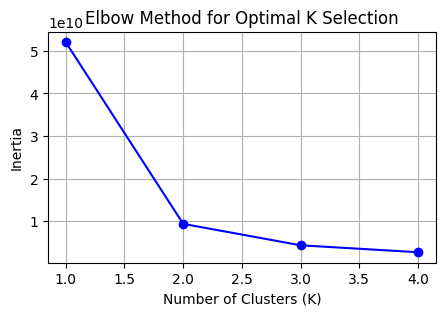

(      OAT[DegC]  HV Battery Power[Watts]  Cluster
 0     15.000000                 0.000000        0
 1     15.000000                 0.000000        0
 2     15.000000                 0.000000        0
 3     15.000000                 0.000000        0
 4     -7.046392                 0.000000        0
 ...         ...                      ...      ...
 5045   3.156085            -11747.988095        4
 5046   6.500000            -11926.910494        4
 5047   1.246269            -12802.824627        4
 5048  -5.041553            -13596.112057        4
 5049  -2.659091            -14409.176136        2
 
 [5050 rows x 3 columns],
 array([0, 0, 0, ..., 4, 4, 2], shape=(5050,), dtype=int32),
 KMeans(n_clusters=5, random_state=42))

In [107]:
plot_kmeans_elbow(df_combined_ob)
fit_predict_kmeans(df_combined_ob,5)

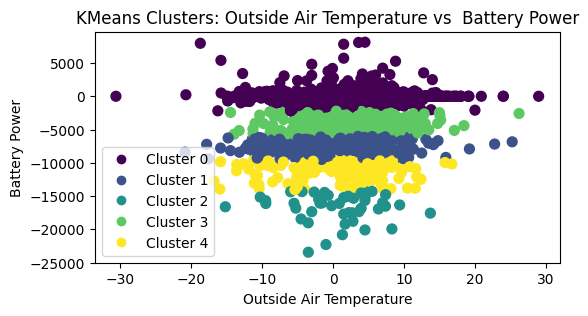

In [108]:
'''
This code creates a scatter plot to visualize KMeans clustering results.
- It plots 'OAT[DegC]' (Outside Air Temperature) vs 'HV Battery Power[Watts]', coloring points by their cluster assignment.
- The color map 'viridis' is used for cluster coloring.
- The plot includes axis labels, a title, and a legend indicating cluster numbers.
'''

plt.figure(figsize=(6, 3))
scatter = plt.scatter(
    df_combined_ob['OAT[DegC]'],
    df_combined_ob['HV Battery Power[Watts]'],
    c=df_combined_ob['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Outside Air Temperature')
plt.ylabel('Battery Power')
plt.title('KMeans Clusters: Outside Air Temperature vs  Battery Power')
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(len(handles))])
plt.show()